TUGAS BESAR - DATA MINING
Kelompok 6

Anggota Kelompok:

1. Ria Andara Azzahra 2211103045
2. Fadiana 2211103055
3. Sa' Baniatun Astia 2211103057

# BUSINESS UNDERSTANDING

Metode: Linear Regression
Tujuan: Memprediksi kadar polutan CO(GT), NO2(GT) dan C6H6(GT) Berdasarkan:
*   Sensor : PT08.S1 (CO), PT08.S2 (NMHC), PT08.S3 (NOx), PT08.S4 (NO2), PT08.S5(O3)
*   ⁠Faktor cuaca : T (Temperature), RH (Relative Humidity), AH (Absolut Humidity)

Penerapan LR:
*   Prediksi CO(GT) -> karbon monoksida berdasarkan data inputan sensor.

Keterangan kolom:

1. CO (GT) - karbon monoksida -> sumber : kendaraan, pembakaran
2. ⁠NMHC (GT) - Non Methane Hydrocarbons -> sumber : bahan bakar, industri
3. ⁠C6H6(GT) - Benzena -> sumber : asap kendaraan, industri
4. ⁠NOx(GT) - Nitrogen Oksida -> sumber : emisi kendaraan, pembakaran
5. ⁠NO2(GT) - Nitrogen Dioksida -> sumber : kendaraan

# DATA UNDERSTANDING

1. Check redudant values
2. Check missing values
3. Check inconsistent values
4. Check outlier
5. Check noisy values

In [9]:
# Import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
import warnings
import statsmodels.api as sm
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
warnings.filterwarnings('ignore')

In [10]:
# Membaca data
dt = pd.read_csv("https://raw.githubusercontent.com/rosease/TP1_DataMining/refs/heads/main/AirQualityUCI.csv", delimiter=';')

In [12]:
# Menampilkan data
dt

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Membersihkan data yang kosong
dt = dt.dropna(axis=1, how='all')
dt

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Menghitung nilai NaN atau Missing Values
dt.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [16]:
# Informasi dari data
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


In [18]:
# Menghitung jumlah duplikat
jml_duplikat = dt.duplicated().sum()
print(f"Jumlah duplikat: {jml_duplikat}")

Jumlah duplikat: 113


In [19]:
# Melihat jumlah data, feature
print("Dataset Shape:", dt.shape)
print("\nData Types:")
print(dt.dtypes)
print("\nBasic Statistics:")
print(dt.describe())
print("\nClass Distribution:")

Dataset Shape: (9471, 15)

Data Types:
Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
dtype: object

Basic Statistics:
       PT08.S1(CO)     NMHC(GT)  PT08.S2(NMHC)      NOx(GT)  PT08.S3(NOx)  \
count  9357.000000  9357.000000    9357.000000  9357.000000   9357.000000   
mean   1048.990061  -159.090093     894.595276   168.616971    794.990168   
std     329.832710   139.789093     342.333252   257.433866    321.993552   
min    -200.000000  -200.000000    -200.000000  -200.000000   -200.000000   
25%     921.000000  -200.000000     711.000000    50.000000    637.000000   
50%    1053.000000  -200.000000     895.000000   141.000000    794.000000   
75%    1221.00

In [20]:
# Melihat tipe data dari feature
dt.dtypes

Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
dtype: object

In [21]:
# Membersihkan data dari nilai '-200', 'NA', dan spasi
replace_values = ['-200', 'NA', '', ' ']

for col in dt.columns:
    dt[col] = dt[col].astype(str).replace(replace_values, pd.NA)

# Konversi kolom Date dan Time ke datetime
# Jika format Time tidak sesuai, bisa disesuaikan
dt['Date'] = pd.to_datetime(dt['Date'], errors='coerce')
dt['Time'] = pd.to_datetime(dt['Time'], format='%H:%M:%S', errors='coerce').dt.time

# Kolom yang ingin dikonversi ke float
float_columns = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']

# Menghapus karakter non-numerik dan mengonversi ke float
for col in float_columns:
    dt[col] = pd.to_numeric(dt[col].str.replace('[^\d.-]', '', regex=True), errors='coerce')

# Menampilkan tipe data setelah konversi
print(dt.dtypes)

# Menampilkan jumlah nilai null per kolom untuk pengecekan
print(dt.isnull().sum())

# Menampilkan beberapa baris pertama untuk memastikan hasil
print(dt.head())

Date             datetime64[ns]
Time             datetime64[ns]
CO(GT)                  float64
PT08.S1(CO)              object
NMHC(GT)                 object
C6H6(GT)                float64
PT08.S2(NMHC)            object
NOx(GT)                  object
PT08.S3(NOx)             object
NO2(GT)                  object
PT08.S4(NO2)             object
PT08.S5(O3)              object
T                       float64
RH                      float64
AH                      float64
dtype: object
Date             5874
Time             9471
CO(GT)           1706
PT08.S1(CO)         0
NMHC(GT)            0
C6H6(GT)          114
PT08.S2(NMHC)       0
NOx(GT)             0
PT08.S3(NOx)        0
NO2(GT)             0
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                 480
RH                480
AH                480
dtype: int64
        Date Time  CO(GT) PT08.S1(CO) NMHC(GT)  C6H6(GT) PT08.S2(NMHC)  \
0 2004-10-03  NaT    26.0      1360.0    150.0     119.0        1046.0   
1 2004-10-03  N

In [22]:
# Melihat tipe data 
dt.dtypes

Date             datetime64[ns]
Time             datetime64[ns]
CO(GT)                  float64
PT08.S1(CO)              object
NMHC(GT)                 object
C6H6(GT)                float64
PT08.S2(NMHC)            object
NOx(GT)                  object
PT08.S3(NOx)             object
NO2(GT)                  object
PT08.S4(NO2)             object
PT08.S5(O3)              object
T                       float64
RH                      float64
AH                      float64
dtype: object

In [23]:
dt.isnull().sum()

Date             5874
Time             9471
CO(GT)           1706
PT08.S1(CO)         0
NMHC(GT)            0
C6H6(GT)          114
PT08.S2(NMHC)       0
NOx(GT)             0
PT08.S3(NOx)        0
NO2(GT)             0
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                 480
RH                480
AH                480
dtype: int64

In [24]:
# Mengonversi kolom numerik ke float
for col in ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']:
    dt[col] = pd.to_numeric(dt[col], errors='coerce')

# Mengisi NaN dengan mean (bisa diganti median, mode, atau nilai tertentu)
for col in ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']:
    dt[col].fillna(dt[col].mean(), inplace=True)

In [25]:
dt.isnull().sum()

Date             5874
Time             9471
CO(GT)              0
PT08.S1(CO)         0
NMHC(GT)            0
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)             0
PT08.S3(NOx)        0
NO2(GT)             0
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
dtype: int64

In [26]:
dt_backup = dt.copy()

In [27]:
# Jika Date dan Time menjadi NaN, kembalikan ke object
dt['Date'] = dt_backup['Date'].astype(str)
dt['Time'] = dt_backup['Time'].astype(str)

In [28]:
dt.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [29]:
print(dt_backup['C6H6(GT)'].unique())

[ 1.19000000e+02  9.40000000e+01  9.00000000e+01  9.20000000e+01
  6.50000000e+01  4.70000000e+01  3.60000000e+01  3.30000000e+01
  2.30000000e+01  1.70000000e+01  1.30000000e+01  1.10000000e+01
  1.60000000e+01  3.20000000e+01  8.00000000e+01  9.50000000e+01
  6.30000000e+01  5.00000000e+01  5.20000000e+01  7.30000000e+01
  1.15000000e+02  8.80000000e+01  8.30000000e+01  1.12000000e+02
  2.08000000e+02  2.74000000e+02  2.40000000e+02  1.28000000e+02
  2.60000000e+01  5.90000000e+01  6.40000000e+01  4.10000000e+01
  1.90000000e+01  1.00000000e+01  1.80000000e+01  4.40000000e+01
  1.79000000e+02  2.21000000e+02  1.40000000e+02  1.16000000e+02
  1.02000000e+02  1.10000000e+02  1.42000000e+02  1.27000000e+02
  1.17000000e+02  1.93000000e+02  1.82000000e+02  3.26000000e+02
  2.01000000e+02  1.43000000e+02  2.18000000e+02  9.60000000e+01
  7.40000000e+01  5.40000000e+01  6.20000000e+01  2.90000000e+01
  5.10000000e+01  1.18000000e+02  1.51000000e+02  1.29000000e+02
  1.61000000e+02  1.23000

In [30]:
import re

# Menampilkan beberapa data untuk inspeksi
print(dt['C6H6(GT)'].apply(repr).head(20))

# Membersihkan data dari karakter non-numerik yang tidak diinginkan
dt['C6H6(GT)'] = dt['C6H6(GT)'].astype(str).apply(lambda x: re.sub(r'[^0-9.-]', '', x))

# Mengonversi ke float dan mengubah yang tidak valid menjadi NaN
dt['C6H6(GT)'] = pd.to_numeric(dt['C6H6(GT)'], errors='coerce')

# Mengisi NaN dengan rata-rata atau cara lain
dt['C6H6(GT)'].fillna(dt['C6H6(GT)'].mean(), inplace=True)

# Cek hasil setelah konversi
print(dt['C6H6(GT)'].head(20))
print(dt['C6H6(GT)'].isnull().sum())  # Mengecek jumlah NaN



0     119.0
1      94.0
2      90.0
3      92.0
4      65.0
5      47.0
6      36.0
7      33.0
8      23.0
9      17.0
10     13.0
11     11.0
12     16.0
13     32.0
14     80.0
15     95.0
16     63.0
17     50.0
18     52.0
19     73.0
Name: C6H6(GT), dtype: object
0     119.0
1      94.0
2      90.0
3      92.0
4      65.0
5      47.0
6      36.0
7      33.0
8      23.0
9      17.0
10     13.0
11     11.0
12     16.0
13     32.0
14     80.0
15     95.0
16     63.0
17     50.0
18     52.0
19     73.0
Name: C6H6(GT), dtype: float64
0


In [31]:
# Mengubah kolom 'C6H6(GT)' menjadi string
dt['C6H6(GT)'] = dt['C6H6(GT)'].astype(str)

# Menampilkan hasil
print(dt['C6H6(GT)'].head(20))


0     119.0
1      94.0
2      90.0
3      92.0
4      65.0
5      47.0
6      36.0
7      33.0
8      23.0
9      17.0
10     13.0
11     11.0
12     16.0
13     32.0
14     80.0
15     95.0
16     63.0
17     50.0
18     52.0
19     73.0
Name: C6H6(GT), dtype: object


In [32]:
dt.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [33]:
dt.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)       object
NMHC(GT)          object
C6H6(GT)          object
PT08.S2(NMHC)     object
NOx(GT)           object
PT08.S3(NOx)      object
NO2(GT)           object
PT08.S4(NO2)      object
PT08.S5(O3)       object
T                float64
RH               float64
AH               float64
dtype: object

In [34]:
# Mengonversi kolom yang bertipe object ke numerik
cols_to_convert = [
    'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
    'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)'
]

for col in cols_to_convert:
    dt[col] = pd.to_numeric(dt[col], errors='coerce')  # 'coerce' mengubah nilai non-numerik menjadi NaN

# Cek hasil konversi
print(dt.dtypes)
print(dt.head(20))


Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object
          Date Time     CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0   2004-10-03  NaT  26.000000       1360.0     150.0     119.0   
1   2004-10-03  NaT   2.000000       1292.0     112.0      94.0   
2   2004-10-03  NaT  22.000000       1402.0      88.0      90.0   
3   2004-10-03  NaT  22.000000       1376.0      80.0      92.0   
4   2004-10-03  NaT  16.000000       1272.0      51.0      65.0   
5   2004-10-03  NaT  12.000000       1197.0      38.0      47.0   
6   2004-11-03  NaT  12.000000       1185.0      31.0      36.0   
7   2004-11-03  NaT   1.000000       1136.0      31.0      33.0   
8   2004

In [35]:
dt.isnull().sum()

Date               0
Time               0
CO(GT)             0
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)           0
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                  0
RH                 0
AH                 0
dtype: int64

In [36]:
# Membersihkan kolom 'C6H6(GT)' dari karakter yang tidak valid
dt['C6H6(GT)'] = dt['C6H6(GT)'].astype(str).apply(lambda x: ''.join(c for c in x if c.isdigit() or c == '.'))

# Mengonversi ke numerik
dt['C6H6(GT)'] = pd.to_numeric(dt['C6H6(GT)'], errors='coerce')

# Mengisi NaN dengan nilai default, misalnya 114 atau rata-rata
dt['C6H6(GT)'].fillna(114, inplace=True)

# Cek hasil
print(dt['C6H6(GT)'].head(20))


0     119.0
1      94.0
2      90.0
3      92.0
4      65.0
5      47.0
6      36.0
7      33.0
8      23.0
9      17.0
10     13.0
11     11.0
12     16.0
13     32.0
14     80.0
15     95.0
16     63.0
17     50.0
18     52.0
19     73.0
Name: C6H6(GT), dtype: float64


In [37]:
dt.isnull().sum()

Date               0
Time               0
CO(GT)             0
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)           0
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                  0
RH                 0
AH                 0
dtype: int64

In [38]:
dt.dropna(inplace=True)  # Menghapus baris yang mengandung NaN

In [39]:
dt.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [40]:
jml_duplikat = dt.duplicated().sum()
print(f"Jumlah duplikat: {jml_duplikat}")

Jumlah duplikat: 28


In [41]:
dt.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

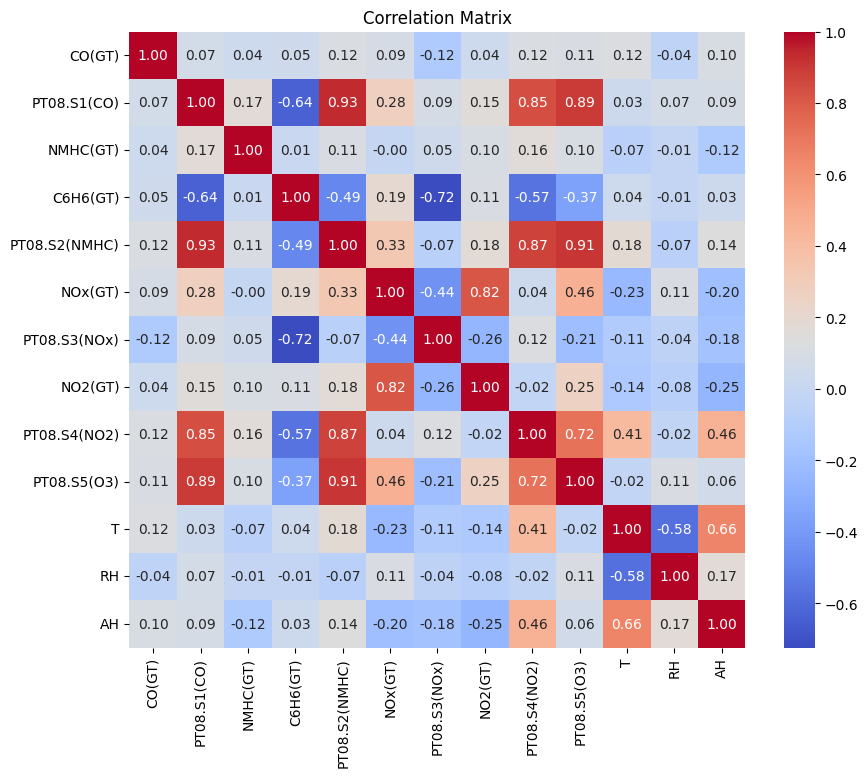

In [42]:
# Mengecualikan kolom 'Date' dan 'Time' yang bertipe objek
numeric_cols = dt.select_dtypes(include=['float64', 'int64']).columns

# Menghitung matriks korelasi hanya untuk kolom numerik
plt.figure(figsize=(10, 8))
corr = dt[numeric_cols].corr()  # Hanya menggunakan kolom numerik
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

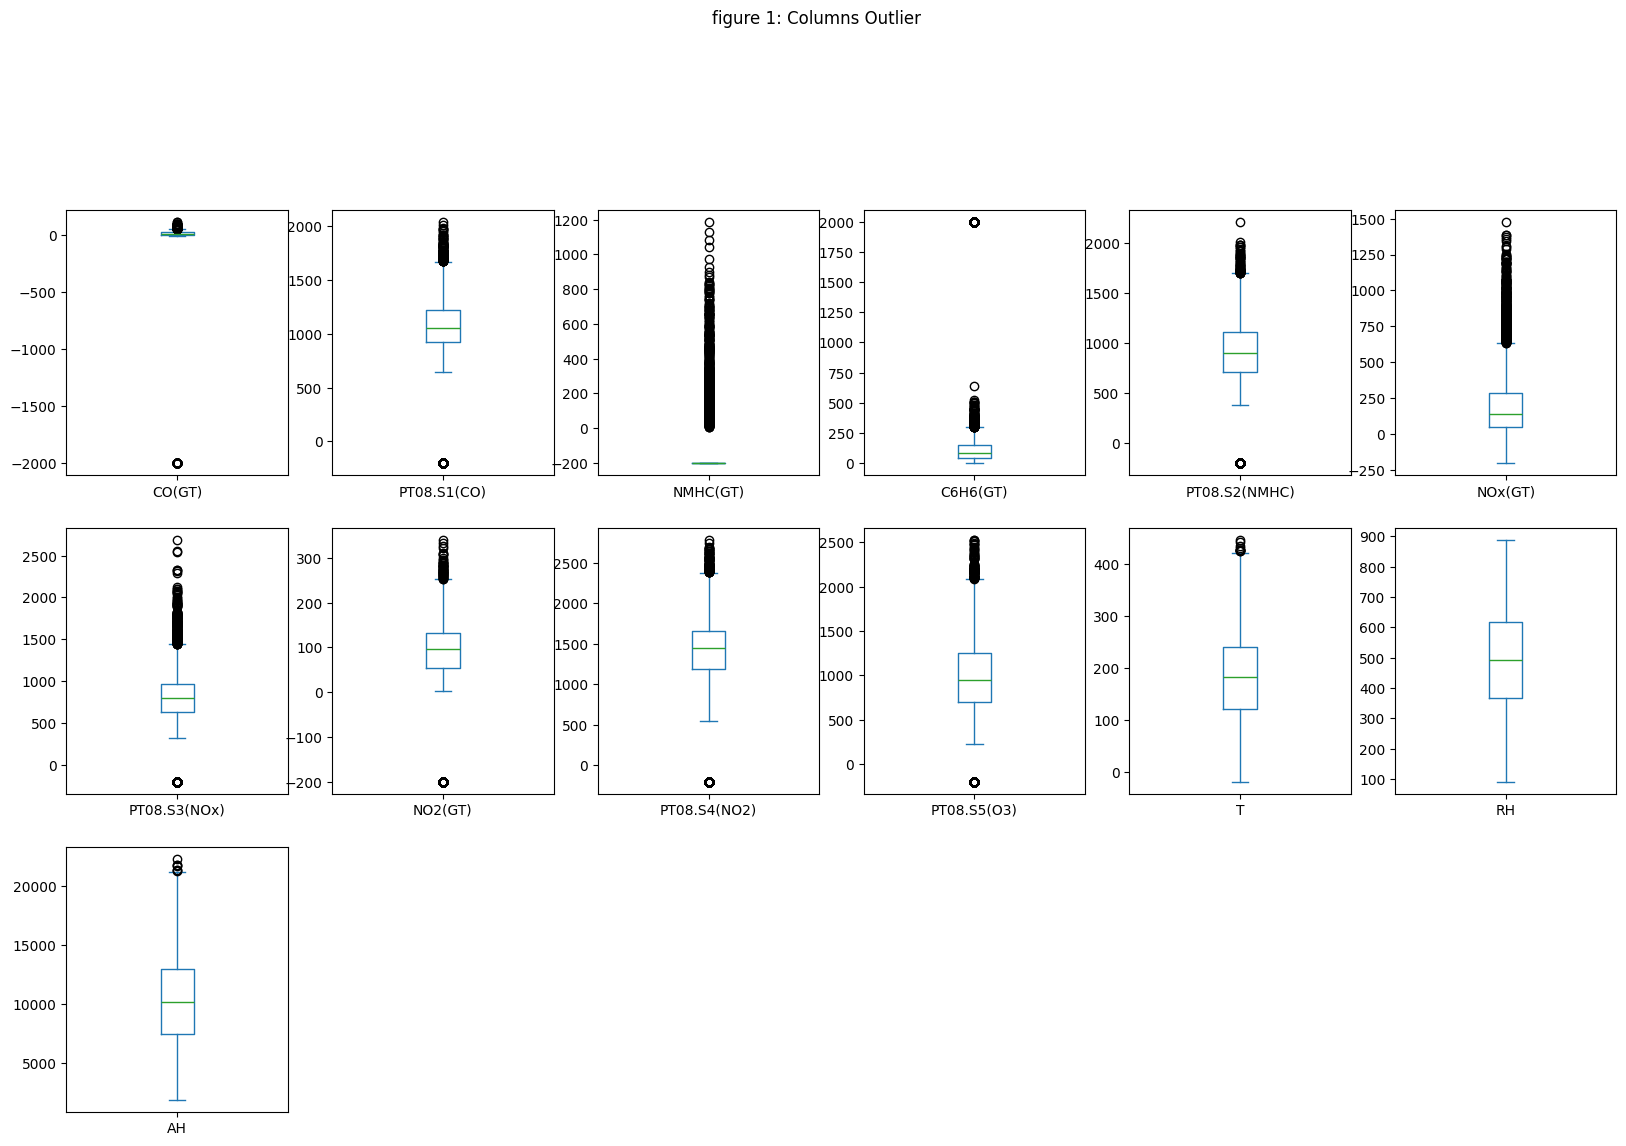

In [43]:
#Visualisasi nilai outlier
dt.describe()
dt.plot(kind='box',subplots=True,layout=(5,6), sharex=False,figsize = (20,20),
        title='figure 1: Columns Outlier')
plt.show()

In [44]:
# Lihat jumlah NaN per kolom
print(dt.isna().sum())

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


Kolom non-numerik: ['Date', 'Time']


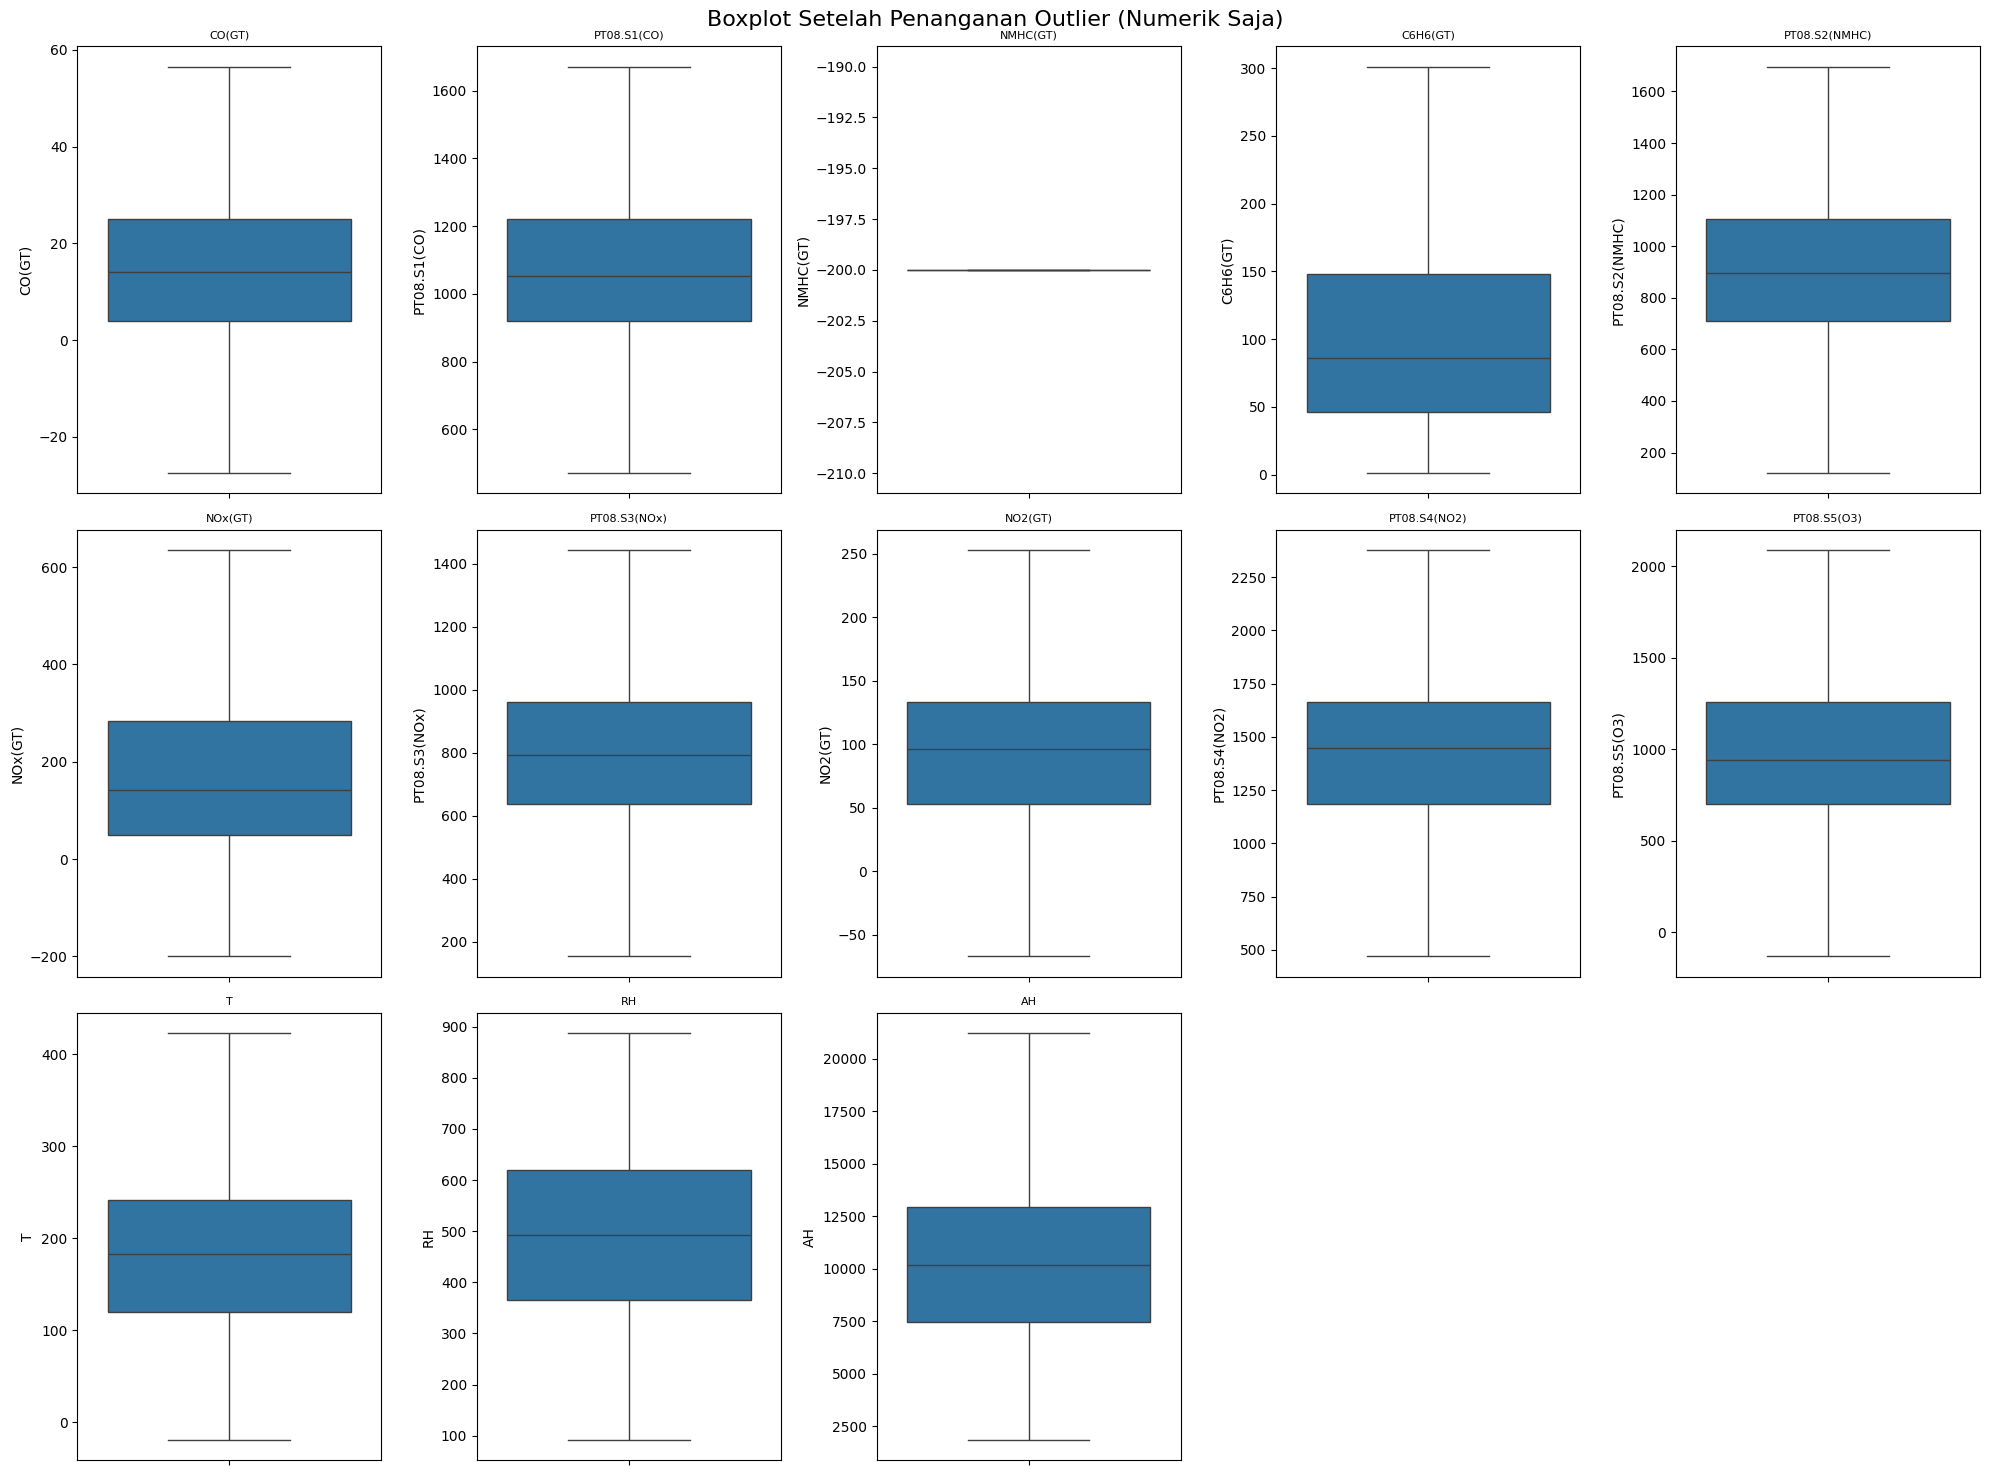

In [45]:
# --- 3. Tangani Outlier (cap outliers versi aman) ---
def cap_outliers(dt):
    dt_capped = dt.copy()
    # Filter hanya kolom bertipe numerik
    numeric_cols = dt.select_dtypes(include=[np.number]).columns

    for col in numeric_cols:
        Q1 = dt[col].quantile(0.25)
        Q3 = dt[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # Batasi nilai outlier
        dt_capped[col] = np.where(dt[col] < lower, lower,
                           np.where(dt[col] > upper, upper, dt[col]))
    return dt_capped

dt_clean = cap_outliers(dt)
non_numeric_cols = dt.select_dtypes(exclude=[np.number]).columns
print("Kolom non-numerik:", list(non_numeric_cols))

# --- 4. Tampilkan Boxplot Ulang untuk Cek Outlier ---
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols):
    plt.subplot(int(np.ceil(len(numeric_cols) / 5)), 5, i + 1)
    sns.boxplot(y=dt_clean[col])
    plt.title(col, fontsize=8)
plt.suptitle("Boxplot Setelah Penanganan Outlier (Numerik Saja)", fontsize=16)
plt.tight_layout()
plt.show()

In [46]:
dt_clean.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [47]:
print(dt_clean.isna().sum())

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [48]:
jml_duplikat = dt_clean.duplicated().sum()
print(f"Jumlah duplikat: {jml_duplikat}")

Jumlah duplikat: 34


In [49]:
dt_clean

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-10-03,NaT,26.0,1360.0,-200.0,119.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,136.0,489.0,7578.0
1,2004-10-03,NaT,2.0,1292.0,-200.0,94.0,955.0,103.0,1174.0,92.0,1559.0,972.0,133.0,477.0,7255.0
2,2004-10-03,NaT,22.0,1402.0,-200.0,90.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,119.0,540.0,7502.0
3,2004-10-03,NaT,22.0,1376.0,-200.0,92.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,110.0,600.0,7867.0
4,2004-10-03,NaT,16.0,1272.0,-200.0,65.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,112.0,596.0,7888.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,NaT,31.0,1314.0,-200.0,135.0,1101.0,472.0,539.0,190.0,1374.0,1729.0,219.0,293.0,7568.0
9353,2005-04-04,NaT,24.0,1163.0,-200.0,114.0,1027.0,353.0,604.0,179.0,1264.0,1269.0,243.0,237.0,7119.0
9354,2005-04-04,NaT,24.0,1142.0,-200.0,124.0,1063.0,293.0,603.0,175.0,1241.0,1092.0,269.0,183.0,6406.0
9355,2005-04-04,NaT,21.0,1003.0,-200.0,95.0,961.0,235.0,702.0,156.0,1041.0,770.0,283.0,135.0,5139.0


In [50]:
dt_clean.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [51]:
print(dt_clean['Time'].unique())

['NaT']


In [52]:
dt_clean.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.0,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,15.350367,1073.926045,-200.0,107.560543,906.392647,158.295287,803.436144,81.331303,1416.519397,976.272416,183.168564,492.342009,10254.970322
std,15.904062,241.568297,0.0,79.327332,303.892878,230.375146,267.925771,81.004224,386.435290,446.317488,86.548696,169.748013,3957.404021
min,-27.500000,471.000000,-200.0,1.000000,120.000000,-200.000000,152.500000,-67.000000,469.500000,-132.500000,-19.000000,92.000000,1847.000000
25%,4.000000,921.000000,-200.0,46.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,120.000000,366.000000,7461.000000
50%,14.000000,1053.000000,-200.0,86.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,183.000000,492.342009,10154.000000
75%,25.000000,1221.000000,-200.0,148.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,241.000000,619.000000,12962.000000
max,56.500000,1671.000000,-200.0,301.000000,1696.000000,635.000000,1444.500000,253.000000,2377.500000,2087.500000,422.500000,887.000000,21213.500000


In [53]:
dt_clean.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [54]:
from datetime import time

# Waktu representatif
time_slots = [time(6, 0), time(12, 0), time(17, 0), time(21, 0)]
labels = ['Pagi', 'Siang', 'Sore', 'Malam']

# Deteksi NaT di kolom 'Time'
mask_nat = dt_clean['Time'].isna()
num_missing = mask_nat.sum()

# Bagi secara merata ke 4 waktu
filled_times = np.tile(time_slots, num_missing // 4 + 1)[:num_missing]

# Masukkan nilai waktu ke baris yang kosong
dt_clean.loc[mask_nat, 'Time'] = filled_times

# Konfirmasi hasil
print(dt_clean['Time'].isna().sum())  # Harus 0

0


In [55]:
dt_clean.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [56]:
dt_clean.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.0,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,15.350367,1073.926045,-200.0,107.560543,906.392647,158.295287,803.436144,81.331303,1416.519397,976.272416,183.168564,492.342009,10254.970322
std,15.904062,241.568297,0.0,79.327332,303.892878,230.375146,267.925771,81.004224,386.435290,446.317488,86.548696,169.748013,3957.404021
min,-27.500000,471.000000,-200.0,1.000000,120.000000,-200.000000,152.500000,-67.000000,469.500000,-132.500000,-19.000000,92.000000,1847.000000
25%,4.000000,921.000000,-200.0,46.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,120.000000,366.000000,7461.000000
50%,14.000000,1053.000000,-200.0,86.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,183.000000,492.342009,10154.000000
75%,25.000000,1221.000000,-200.0,148.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,241.000000,619.000000,12962.000000
max,56.500000,1671.000000,-200.0,301.000000,1696.000000,635.000000,1444.500000,253.000000,2377.500000,2087.500000,422.500000,887.000000,21213.500000


In [57]:
dt_clean

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-10-03,NaT,26.0,1360.0,-200.0,119.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,136.0,489.0,7578.0
1,2004-10-03,NaT,2.0,1292.0,-200.0,94.0,955.0,103.0,1174.0,92.0,1559.0,972.0,133.0,477.0,7255.0
2,2004-10-03,NaT,22.0,1402.0,-200.0,90.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,119.0,540.0,7502.0
3,2004-10-03,NaT,22.0,1376.0,-200.0,92.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,110.0,600.0,7867.0
4,2004-10-03,NaT,16.0,1272.0,-200.0,65.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,112.0,596.0,7888.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,NaT,31.0,1314.0,-200.0,135.0,1101.0,472.0,539.0,190.0,1374.0,1729.0,219.0,293.0,7568.0
9353,2005-04-04,NaT,24.0,1163.0,-200.0,114.0,1027.0,353.0,604.0,179.0,1264.0,1269.0,243.0,237.0,7119.0
9354,2005-04-04,NaT,24.0,1142.0,-200.0,124.0,1063.0,293.0,603.0,175.0,1241.0,1092.0,269.0,183.0,6406.0
9355,2005-04-04,NaT,21.0,1003.0,-200.0,95.0,961.0,235.0,702.0,156.0,1041.0,770.0,283.0,135.0,5139.0


Kolom non-numerik: ['Date', 'Time']


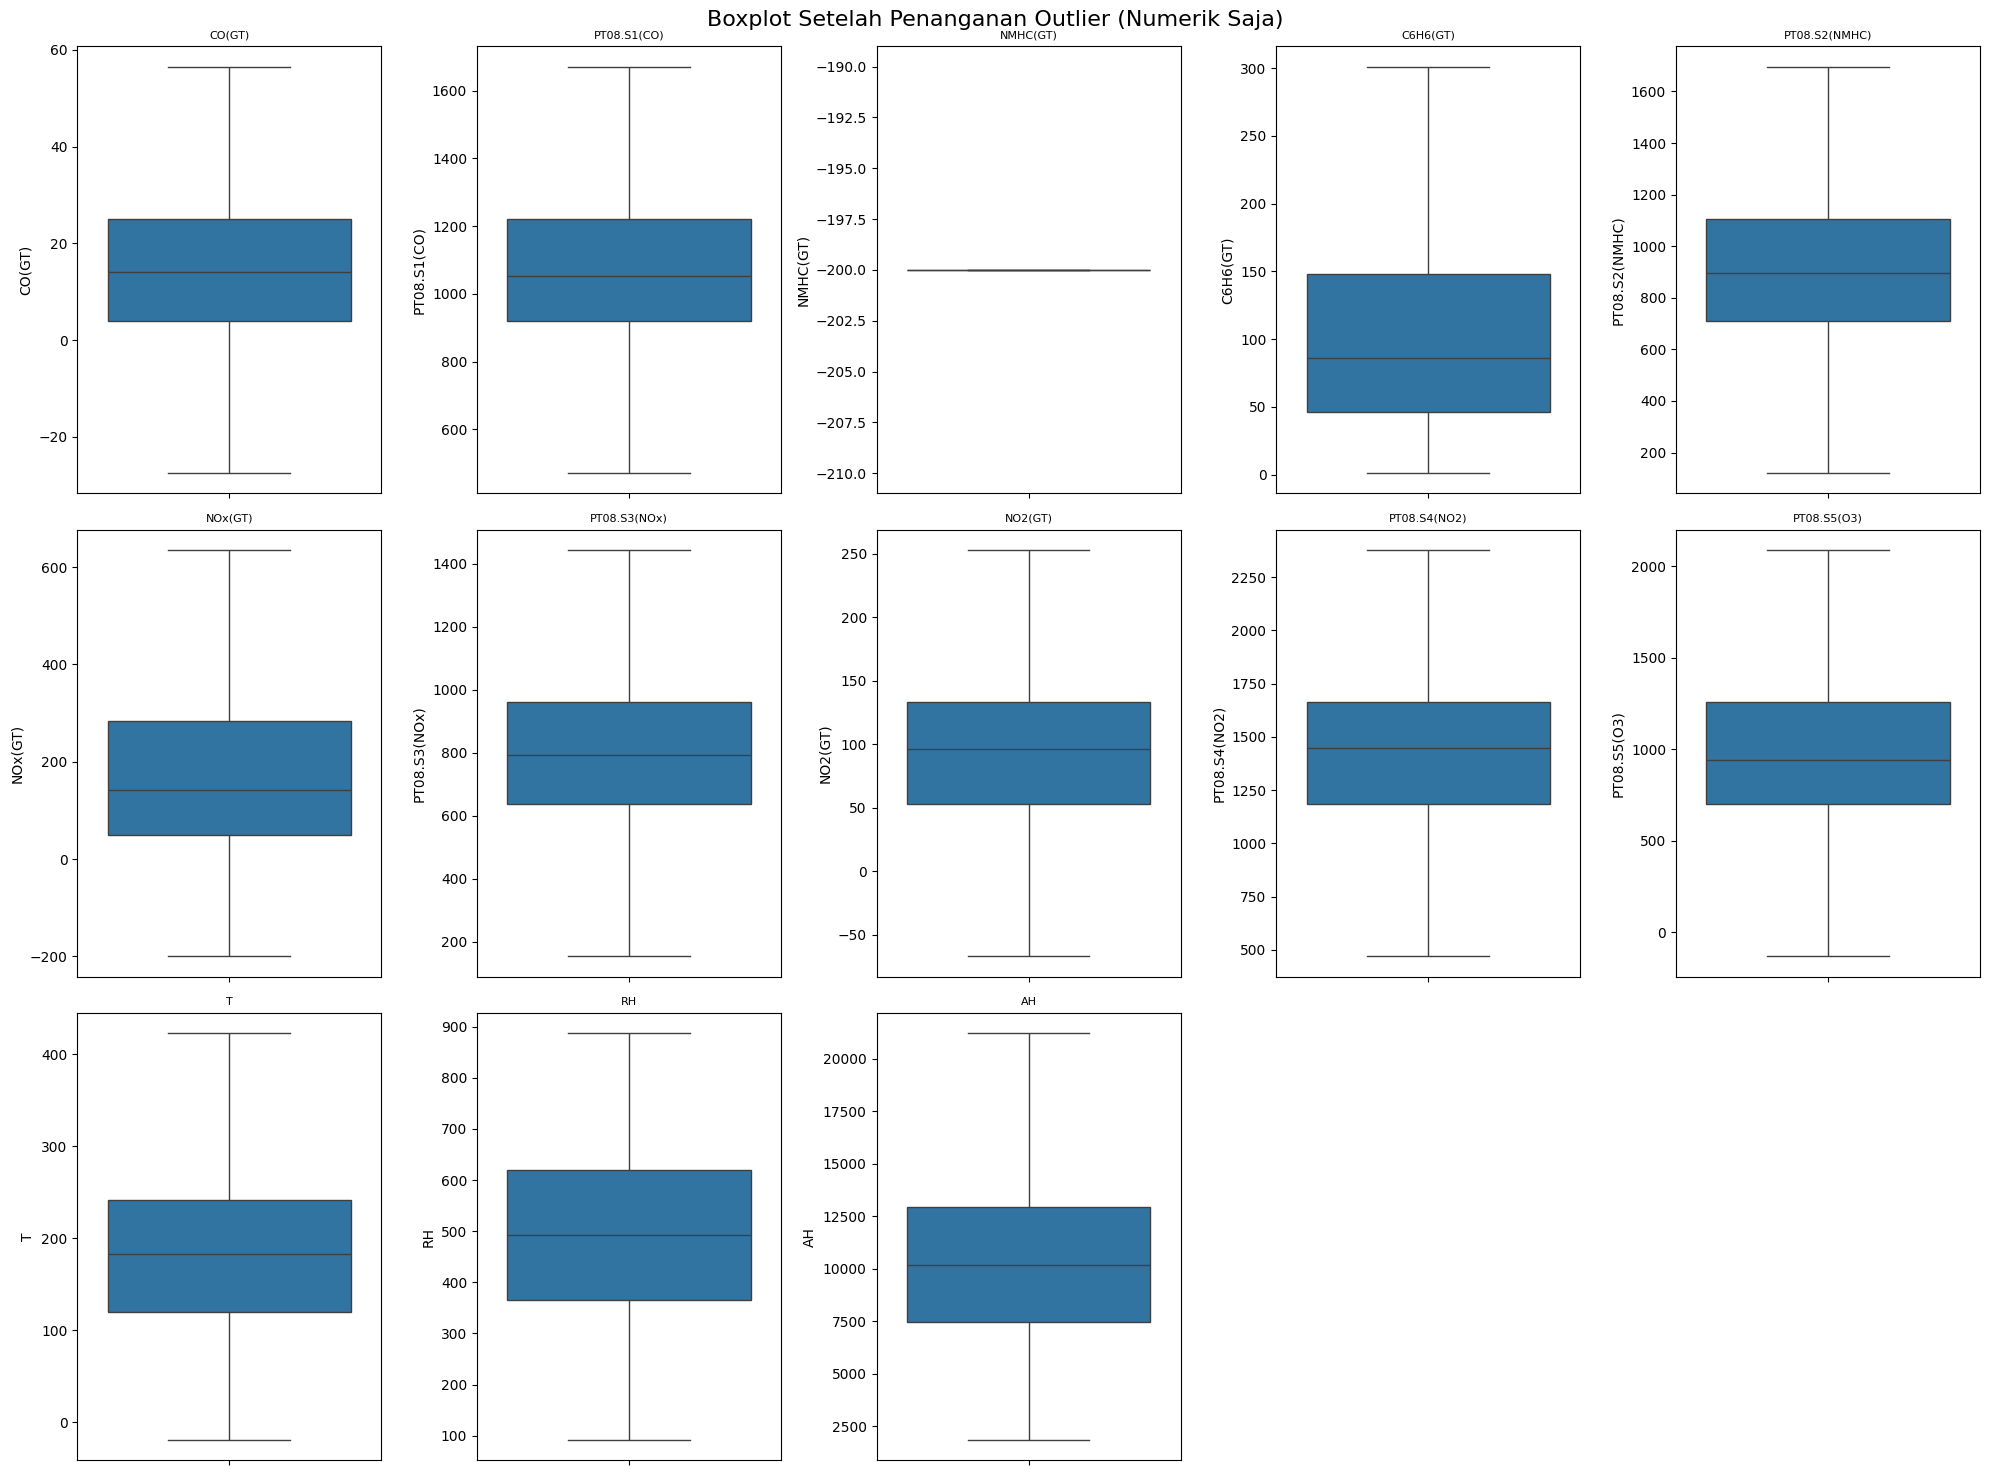

In [58]:
non_numeric_cols = dt.select_dtypes(exclude=[np.number]).columns
print("Kolom non-numerik:", list(non_numeric_cols))

# --- 4. Tampilkan Boxplot Ulang untuk Cek Outlier ---
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols):
    plt.subplot(int(np.ceil(len(numeric_cols) / 5)), 5, i + 1)
    sns.boxplot(y=dt_clean[col])
    plt.title(col, fontsize=8)
plt.suptitle("Boxplot Setelah Penanganan Outlier (Numerik Saja)", fontsize=16)
plt.tight_layout()
plt.show()

In [59]:
# Mengecek duplikat berdasarkan seluruh kolom
jml_duplikat = dt_clean.duplicated().sum()
print(f"Jumlah duplikat: {jml_duplikat}")

Jumlah duplikat: 34


In [60]:
# Mengasumsikan dt_clean sudah ada
dt_clean = dt_clean.drop_duplicates()

# Menampilkan data yang sudah dibersihkan
print(dt_clean)

            Date Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
0     2004-10-03  NaT    26.0       1360.0    -200.0     119.0         1046.0   
1     2004-10-03  NaT     2.0       1292.0    -200.0      94.0          955.0   
2     2004-10-03  NaT    22.0       1402.0    -200.0      90.0          939.0   
3     2004-10-03  NaT    22.0       1376.0    -200.0      92.0          948.0   
4     2004-10-03  NaT    16.0       1272.0    -200.0      65.0          836.0   
...          ...  ...     ...          ...       ...       ...            ...   
9352  2005-04-04  NaT    31.0       1314.0    -200.0     135.0         1101.0   
9353  2005-04-04  NaT    24.0       1163.0    -200.0     114.0         1027.0   
9354  2005-04-04  NaT    24.0       1142.0    -200.0     124.0         1063.0   
9355  2005-04-04  NaT    21.0       1003.0    -200.0      95.0          961.0   
9356  2005-04-04  NaT    22.0       1071.0    -200.0     119.0         1047.0   

      NOx(GT)  PT08.S3(NOx)

In [61]:
# Mengecek duplikat berdasarkan seluruh kolom
jml_duplikat = dt_clean.duplicated().sum()
print(f"Jumlah duplikat: {jml_duplikat}")

Jumlah duplikat: 0


In [62]:
# Mengecek kolom yang mengandung -200.0
columns_with_inconsistent_values = []

for col in dt_clean.columns:
    if dt_clean[col].eq(-200.0).any():  # Mengecek apakah ada nilai -200.0 di kolom
        columns_with_inconsistent_values.append(col)

# Menampilkan kolom yang memiliki nilai -200.0
print("Kolom dengan nilai -200.0 (tidak konsisten):")
print(columns_with_inconsistent_values)

Kolom dengan nilai -200.0 (tidak konsisten):
['NMHC(GT)', 'NOx(GT)']


In [63]:
# Kolom yang memiliki nilai -200.0 yang perlu diganti
cols_change = ['NMHC(GT)', 'NOx(GT)']

# Mengganti nilai -200.0 dengan median untuk setiap kolom
for col in cols_change:
    # Mengganti nilai -200.0 dengan NaN untuk perhitungan median
    valid_values = dt_clean[col].replace(-200.0, np.nan)

    # Menghitung median hanya jika masih ada nilai yang valid setelah penggantian
    if valid_values.notna().any():  # Mengecek apakah ada nilai selain NaN
        median_value = valid_values.median()  # Menghitung median dari nilai yang valid
        dt_clean[col] = dt_clean[col].replace(-200.0, median_value)  # Ganti -200.0 dengan median
    else:
        print(f"Kolom {col} tidak memiliki data yang valid setelah penggantian -200.0.")

# Menampilkan DataFrame setelah perubahan
print(dt_clean[cols_change].head())  # Menampilkan kolom yang sudah diperbaiki

Kolom NMHC(GT) tidak memiliki data yang valid setelah penggantian -200.0.
   NMHC(GT)  NOx(GT)
0    -200.0    166.0
1    -200.0    103.0
2    -200.0    131.0
3    -200.0    172.0
4    -200.0    131.0


In [64]:
dt_clean.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [65]:
# Misalkan dt_clean adalah DataFrame Anda

# Kolom yang akan diperbaiki
col_to_fix = 'NMHC(GT)'

# Menentukan rentang nilai yang realistis untuk NMHC(GT)
min_value = 50.0  # Nilai minimum yang masuk akal
max_value = 150.0  # Nilai maksimum yang masuk akal

# Mengganti nilai -200.0 dengan NaN terlebih dahulu
dt_clean[col_to_fix] = dt_clean[col_to_fix].replace(-200.0, np.nan)

# Membuat nilai acak untuk menggantikan NaN dalam rentang yang ditentukan
np.random.seed(0)  # Set seed untuk reproduktifitas
random_values = np.random.uniform(min_value, max_value, size=dt_clean[col_to_fix].isna().sum())

# Menyisipkan nilai acak pada posisi NaN
dt_clean.loc[dt_clean[col_to_fix].isna(), col_to_fix] = random_values

# Menampilkan hasil
print(dt_clean[col_to_fix].head())  # Menampilkan kolom yang sudah diperbaiki

0    104.881350
1    121.518937
2    110.276338
3    104.488318
4     92.365480
Name: NMHC(GT), dtype: float64


In [66]:
dt_clean.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [67]:
# Mengecek duplikat berdasarkan seluruh kolom
jml_duplikat = dt_clean.duplicated().sum()
print(f"Jumlah duplikat: {jml_duplikat}")

Jumlah duplikat: 0


In [68]:
dt_clean

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-10-03,NaT,26.0,1360.0,104.881350,119.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,136.0,489.0,7578.0
1,2004-10-03,NaT,2.0,1292.0,121.518937,94.0,955.0,103.0,1174.0,92.0,1559.0,972.0,133.0,477.0,7255.0
2,2004-10-03,NaT,22.0,1402.0,110.276338,90.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,119.0,540.0,7502.0
3,2004-10-03,NaT,22.0,1376.0,104.488318,92.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,110.0,600.0,7867.0
4,2004-10-03,NaT,16.0,1272.0,92.365480,65.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,112.0,596.0,7888.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,NaT,31.0,1314.0,92.999159,135.0,1101.0,472.0,539.0,190.0,1374.0,1729.0,219.0,293.0,7568.0
9353,2005-04-04,NaT,24.0,1163.0,128.859841,114.0,1027.0,353.0,604.0,179.0,1264.0,1269.0,243.0,237.0,7119.0
9354,2005-04-04,NaT,24.0,1142.0,146.957867,124.0,1063.0,293.0,603.0,175.0,1241.0,1092.0,269.0,183.0,6406.0
9355,2005-04-04,NaT,21.0,1003.0,76.607927,95.0,961.0,235.0,702.0,156.0,1041.0,770.0,283.0,135.0,5139.0


Kolom non-numerik: ['Date', 'Time']


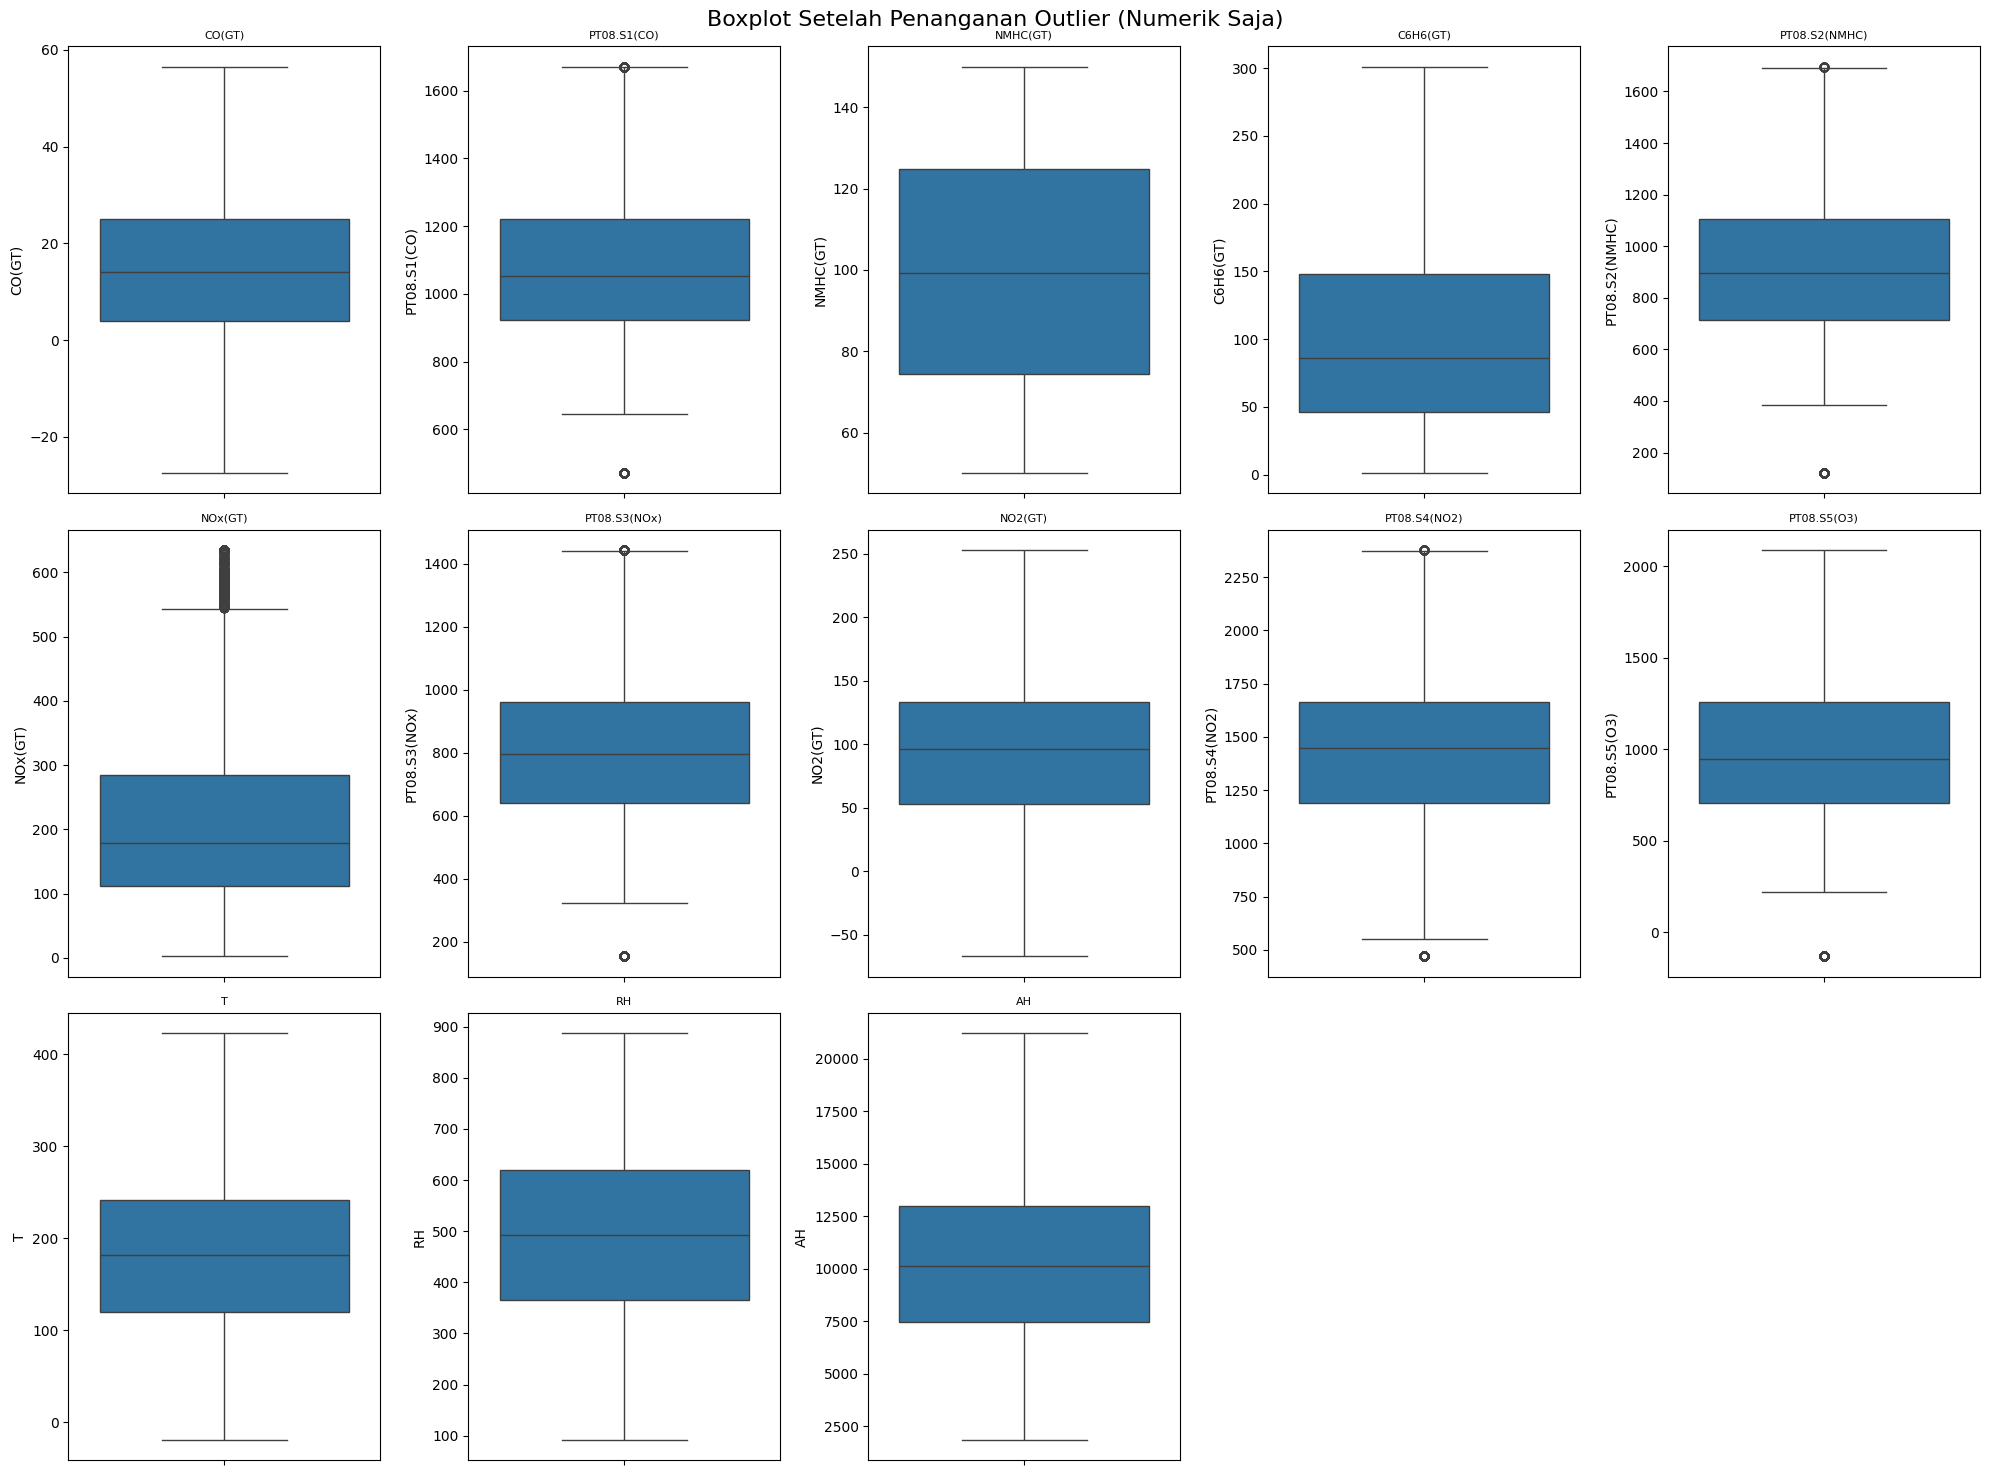

In [69]:
non_numeric_cols = dt_clean.select_dtypes(exclude=[np.number]).columns
print("Kolom non-numerik:", list(non_numeric_cols))

# --- 4. Tampilkan Boxplot Ulang untuk Cek Outlier ---
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols):
    plt.subplot(int(np.ceil(len(numeric_cols) / 5)), 5, i + 1)
    sns.boxplot(y=dt_clean[col])
    plt.title(col, fontsize=8)
plt.suptitle("Boxplot Setelah Penanganan Outlier (Numerik Saja)", fontsize=16)
plt.tight_layout()
plt.show()

In [70]:
# Kolom yang mengandung outlier
cols_with_outliers = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']

# Fungsi untuk mendeteksi outlier dan menampilkan jumlah outlier
def count_outliers(dt_clean, cols):
    outlier_counts = {}

    for col in cols:
        # Menghitung Q1, Q3 dan IQR
        Q1 = dt_clean[col].quantile(0.25)
        Q3 = dt_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        # Mendefinisikan batas bawah dan batas atas untuk outlier
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Menampilkan jumlah outlier di kolom ini
        outliers = ((dt_clean[col] < lower_bound) | (dt_clean[col] > upper_bound))
        outlier_count = outliers.sum()

        outlier_counts[col] = outlier_count

    return outlier_counts

# Menghitung jumlah outlier
outlier_counts = count_outliers(dt_clean, cols_with_outliers)

# Menampilkan jumlah outlier
for col, count in outlier_counts.items():
    print(f"Jumlah outlier di kolom {col}: {count}")

Jumlah outlier di kolom PT08.S1(CO): 450
Jumlah outlier di kolom PT08.S2(NMHC): 393
Jumlah outlier di kolom NOx(GT): 768
Jumlah outlier di kolom PT08.S3(NOx): 568
Jumlah outlier di kolom PT08.S4(NO2): 417
Jumlah outlier di kolom PT08.S5(O3): 332


In [71]:
# Menghapus baris yang memiliki outlier berdasarkan IQR
def remove_outliers(dt_clean, cols):
    for col in cols:
        Q1 = dt_clean[col].quantile(0.25)
        Q3 = dt_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Hapus baris yang memiliki outlier
        dt_clean = dt_clean[(dt_clean[col] >= lower_bound) & (dt_clean[col] <= upper_bound)]

    return dt_clean

# Menghapus outlier
dt_clean_outliers_removed = remove_outliers(dt_clean, cols_with_outliers)

# Menampilkan hasil setelah penghapusan outlier
print(dt_clean_outliers_removed[cols_with_outliers].head())

   PT08.S1(CO)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  PT08.S4(NO2)  \
0       1360.0         1046.0    166.0        1056.0        1692.0   
1       1292.0          955.0    103.0        1174.0        1559.0   
2       1402.0          939.0    131.0        1140.0        1555.0   
3       1376.0          948.0    172.0        1092.0        1584.0   
4       1272.0          836.0    131.0        1205.0        1490.0   

   PT08.S5(O3)  
0       1268.0  
1        972.0  
2       1074.0  
3       1203.0  
4       1110.0  


Kolom numerik: ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


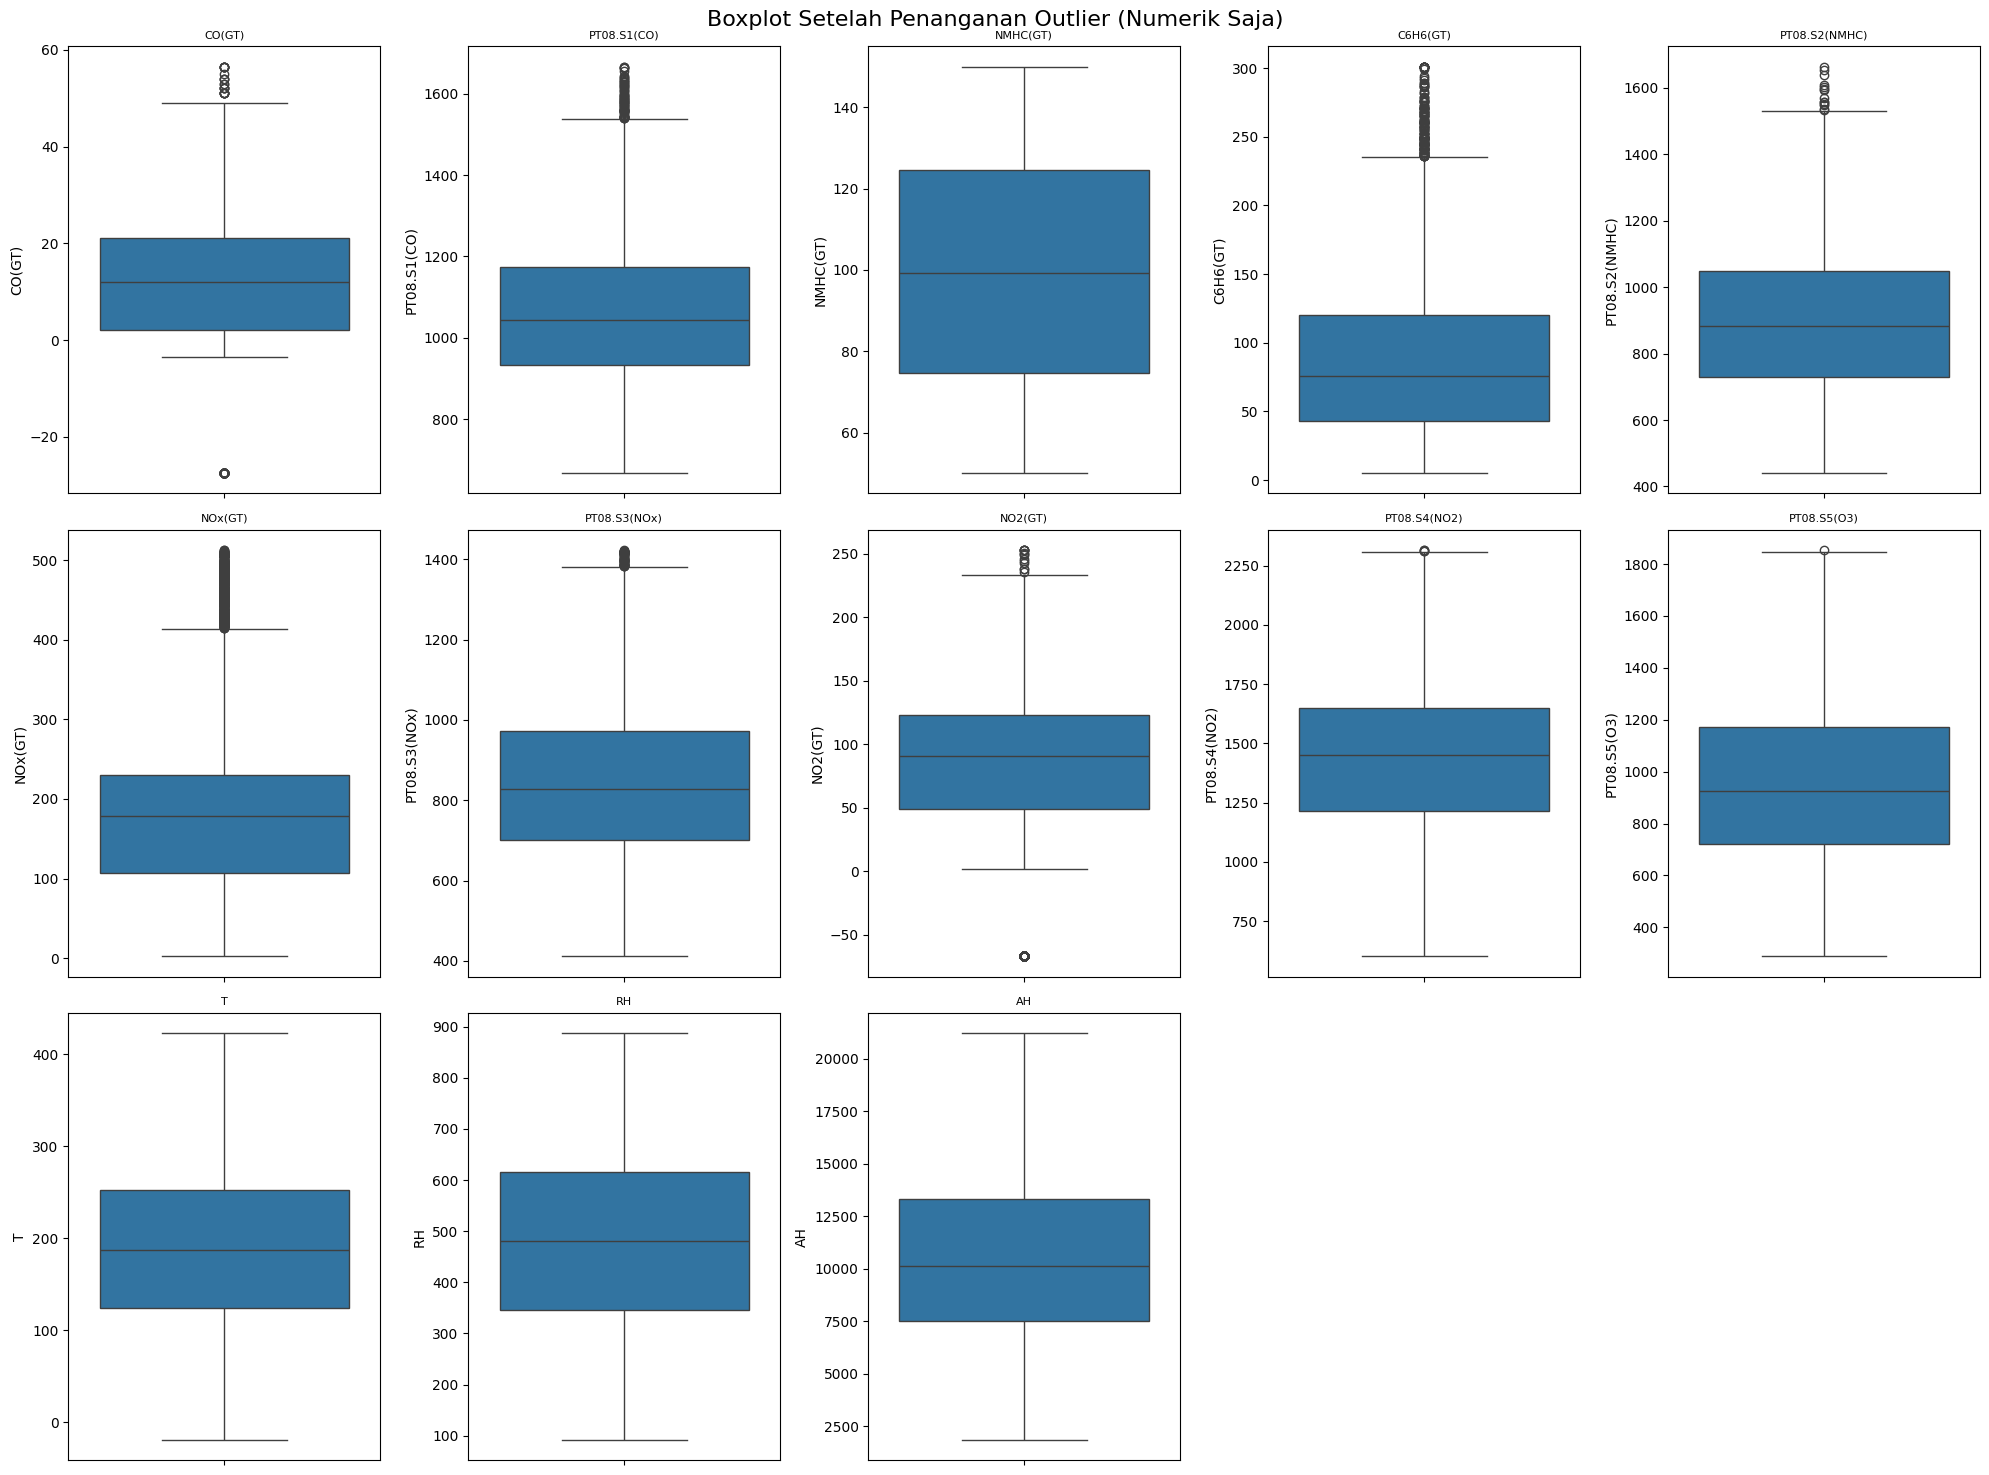

In [72]:
# Menentukan kolom numerik setelah proses pembersihan
numeric_cols = dt_clean_outliers_removed.select_dtypes(include=[np.number]).columns

# Tampilkan kolom numerik
print("Kolom numerik:", list(numeric_cols))

# --- 4. Tampilkan Boxplot Ulang untuk Cek Outlier ---
plt.figure(figsize=(20, 15))

# Membuat boxplot untuk setiap kolom numerik
for i, col in enumerate(numeric_cols):
    plt.subplot(int(np.ceil(len(numeric_cols) / 5)), 5, i + 1)  # Membuat subplots secara otomatis
    sns.boxplot(y=dt_clean_outliers_removed[col])  # Boxplot berdasarkan data setelah penghapusan outlier
    plt.title(col, fontsize=8)  # Menambahkan judul untuk setiap plot

plt.suptitle("Boxplot Setelah Penanganan Outlier (Numerik Saja)", fontsize=16)  # Judul utama
plt.tight_layout()  # Menyusun layout agar tidak tumpang tindih
plt.show()

In [73]:
# Kolom yang mengandung outlier
cols_outlierss = ['CO(GT)', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'C6H6(GT)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)']

# Fungsi untuk mendeteksi outlier dan menampilkan jumlah outlier
def count_outliers(dt_clean_outliers_removed, cols):
    outlier_counts = {}

    for col in cols:
        # Menghitung Q1, Q3 dan IQR
        Q1 = dt_clean_outliers_removed[col].quantile(0.25)
        Q3 = dt_clean_outliers_removed[col].quantile(0.75)
        IQR = Q3 - Q1

        # Mendefinisikan batas bawah dan batas atas untuk outlier
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Menampilkan jumlah outlier di kolom ini
        outliers = ((dt_clean_outliers_removed[col] < lower_bound) | (dt_clean_outliers_removed[col] > upper_bound))
        outlier_count = outliers.sum()

        outlier_counts[col] = outlier_count

    return outlier_counts

# Menghitung jumlah outlier
outlier_counts = count_outliers(dt_clean_outliers_removed, cols_with_outliers)

# Menampilkan jumlah outlier
for col, count in outlier_counts.items():
    print(f"Jumlah outlier di kolom {col}: {count}")

Jumlah outlier di kolom PT08.S1(CO): 69
Jumlah outlier di kolom PT08.S2(NMHC): 14
Jumlah outlier di kolom NOx(GT): 391
Jumlah outlier di kolom PT08.S3(NOx): 49
Jumlah outlier di kolom PT08.S4(NO2): 4
Jumlah outlier di kolom PT08.S5(O3): 1


In [74]:
def replace_outliers_with_median(data, cols):
    data_filled = data.copy()
    for col in cols:
        Q1 = data_filled[col].quantile(0.25)
        Q3 = data_filled[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        median_value = data_filled[col].median()

        # Ganti nilai outlier dengan median
        data_filled.loc[(data_filled[col] < lower_bound) | (data_filled[col] > upper_bound), col] = median_value

    return data_filled

# Terapkan ke dt_clean dan simpan ke variabel baru
dt_clean_remove_outlier = replace_outliers_with_median(dt_clean, cols_outlierss)

# Tampilkan jumlah data
print(f"\nJumlah data setelah pengisian outlier (dengan median): {len(dt_clean_remove_outlier)} baris")



Jumlah data setelah pengisian outlier (dengan median): 9323 baris


In [75]:
# Cek jumlah outlier tersisa setelah penggantian
def count_remaining_outliers(data, cols):
    outlier_count = {}
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower) | (data[col] > upper)]
        outlier_count[col] = len(outliers)
    return outlier_count

outlier_summary = count_remaining_outliers(dt_clean_remove_outlier, cols_outlierss)
print("Sisa outlier setelah penggantian:", outlier_summary)

Sisa outlier setelah penggantian: {'CO(GT)': 0, 'PT08.S1(CO)': 59, 'PT08.S2(NMHC)': 39, 'C6H6(GT)': 0, 'NOx(GT)': 660, 'PT08.S3(NOx)': 101, 'NO2(GT)': 0, 'PT08.S4(NO2)': 60, 'PT08.S5(O3)': 125}


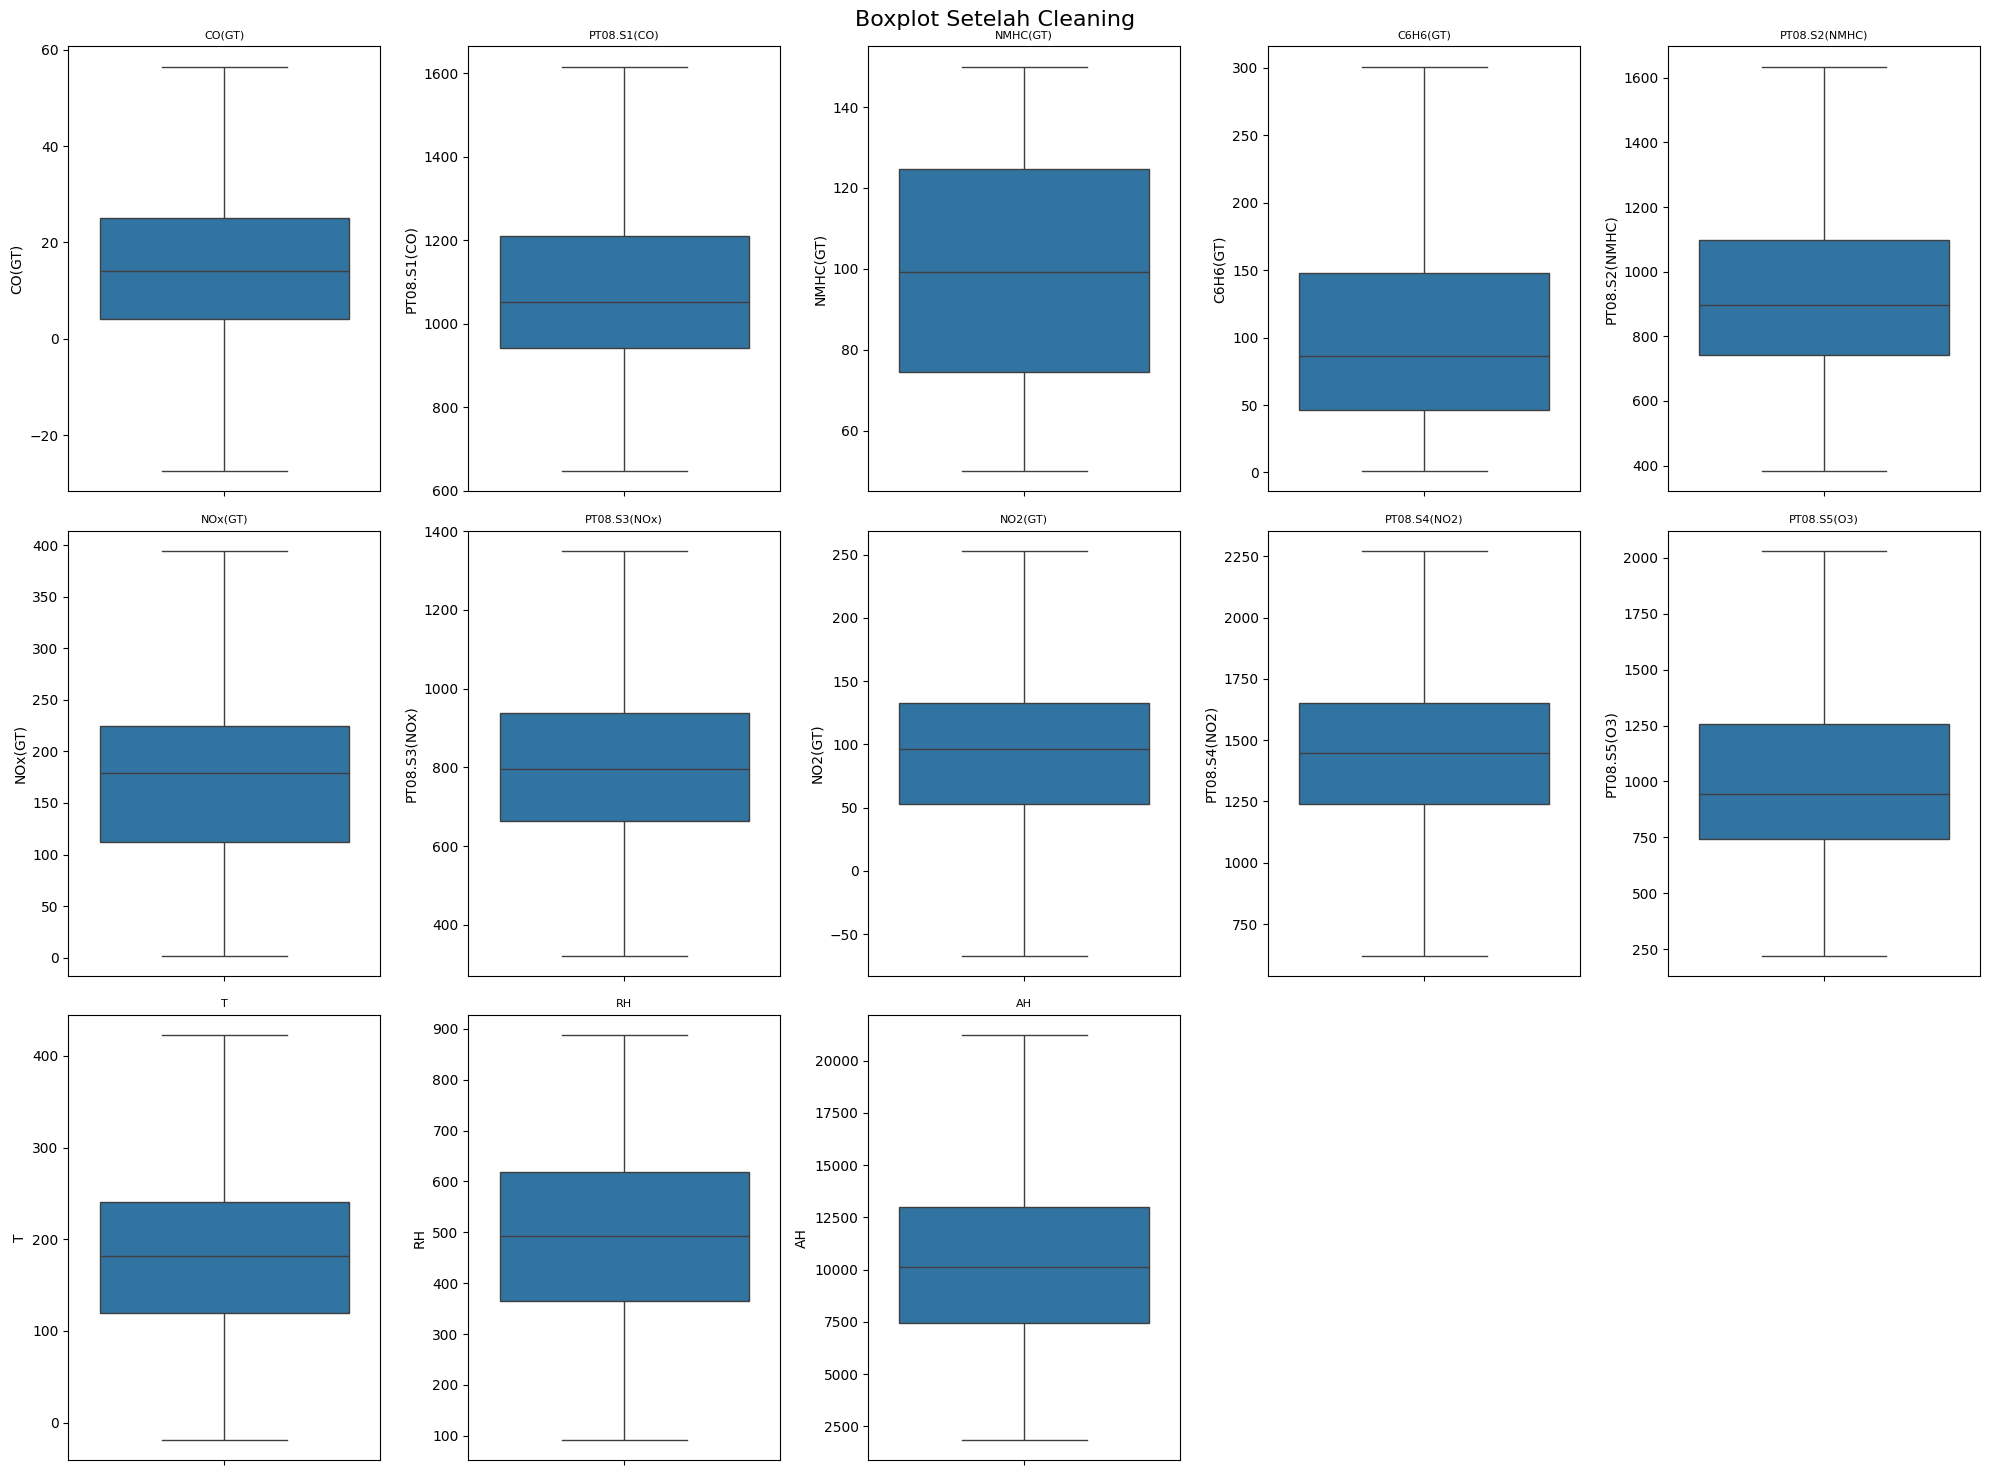

In [76]:
# Fungsi untuk clipping outlier
def clip_outliers(data, cols):
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # Clipping nilai yang lebih kecil dari lower dan lebih besar dari upper
        data[col] = data[col].clip(lower, upper)

    return data

# Terapkan clipping ke dt_clean_remove_outlier untuk menangani sisa outlier
dt_clean_final = clip_outliers(dt_clean_remove_outlier, cols_outlierss)

# Tampilkan boxplot untuk cek apakah clipping berhasil
plt.figure(figsize=(20, 15))

for i, col in enumerate(numeric_cols):
    plt.subplot(int(np.ceil(len(numeric_cols) / 5)), 5, i + 1)
    sns.boxplot(y=dt_clean_final[col])
    plt.title(col, fontsize=8)

plt.suptitle("Boxplot Setelah Cleaning", fontsize=16)
plt.tight_layout()
plt.show()

Jumlah nilai null/Nan Setelah Cleansing:
Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

Persentase missing values per kolom:
Date             0.0
Time             0.0
CO(GT)           0.0
PT08.S1(CO)      0.0
NMHC(GT)         0.0
C6H6(GT)         0.0
PT08.S2(NMHC)    0.0
NOx(GT)          0.0
PT08.S3(NOx)     0.0
NO2(GT)          0.0
PT08.S4(NO2)     0.0
PT08.S5(O3)      0.0
T                0.0
RH               0.0
AH               0.0
dtype: float64
Jumlah duplikat: 0
Jumlah data setelah menghapus duplikat: 9323


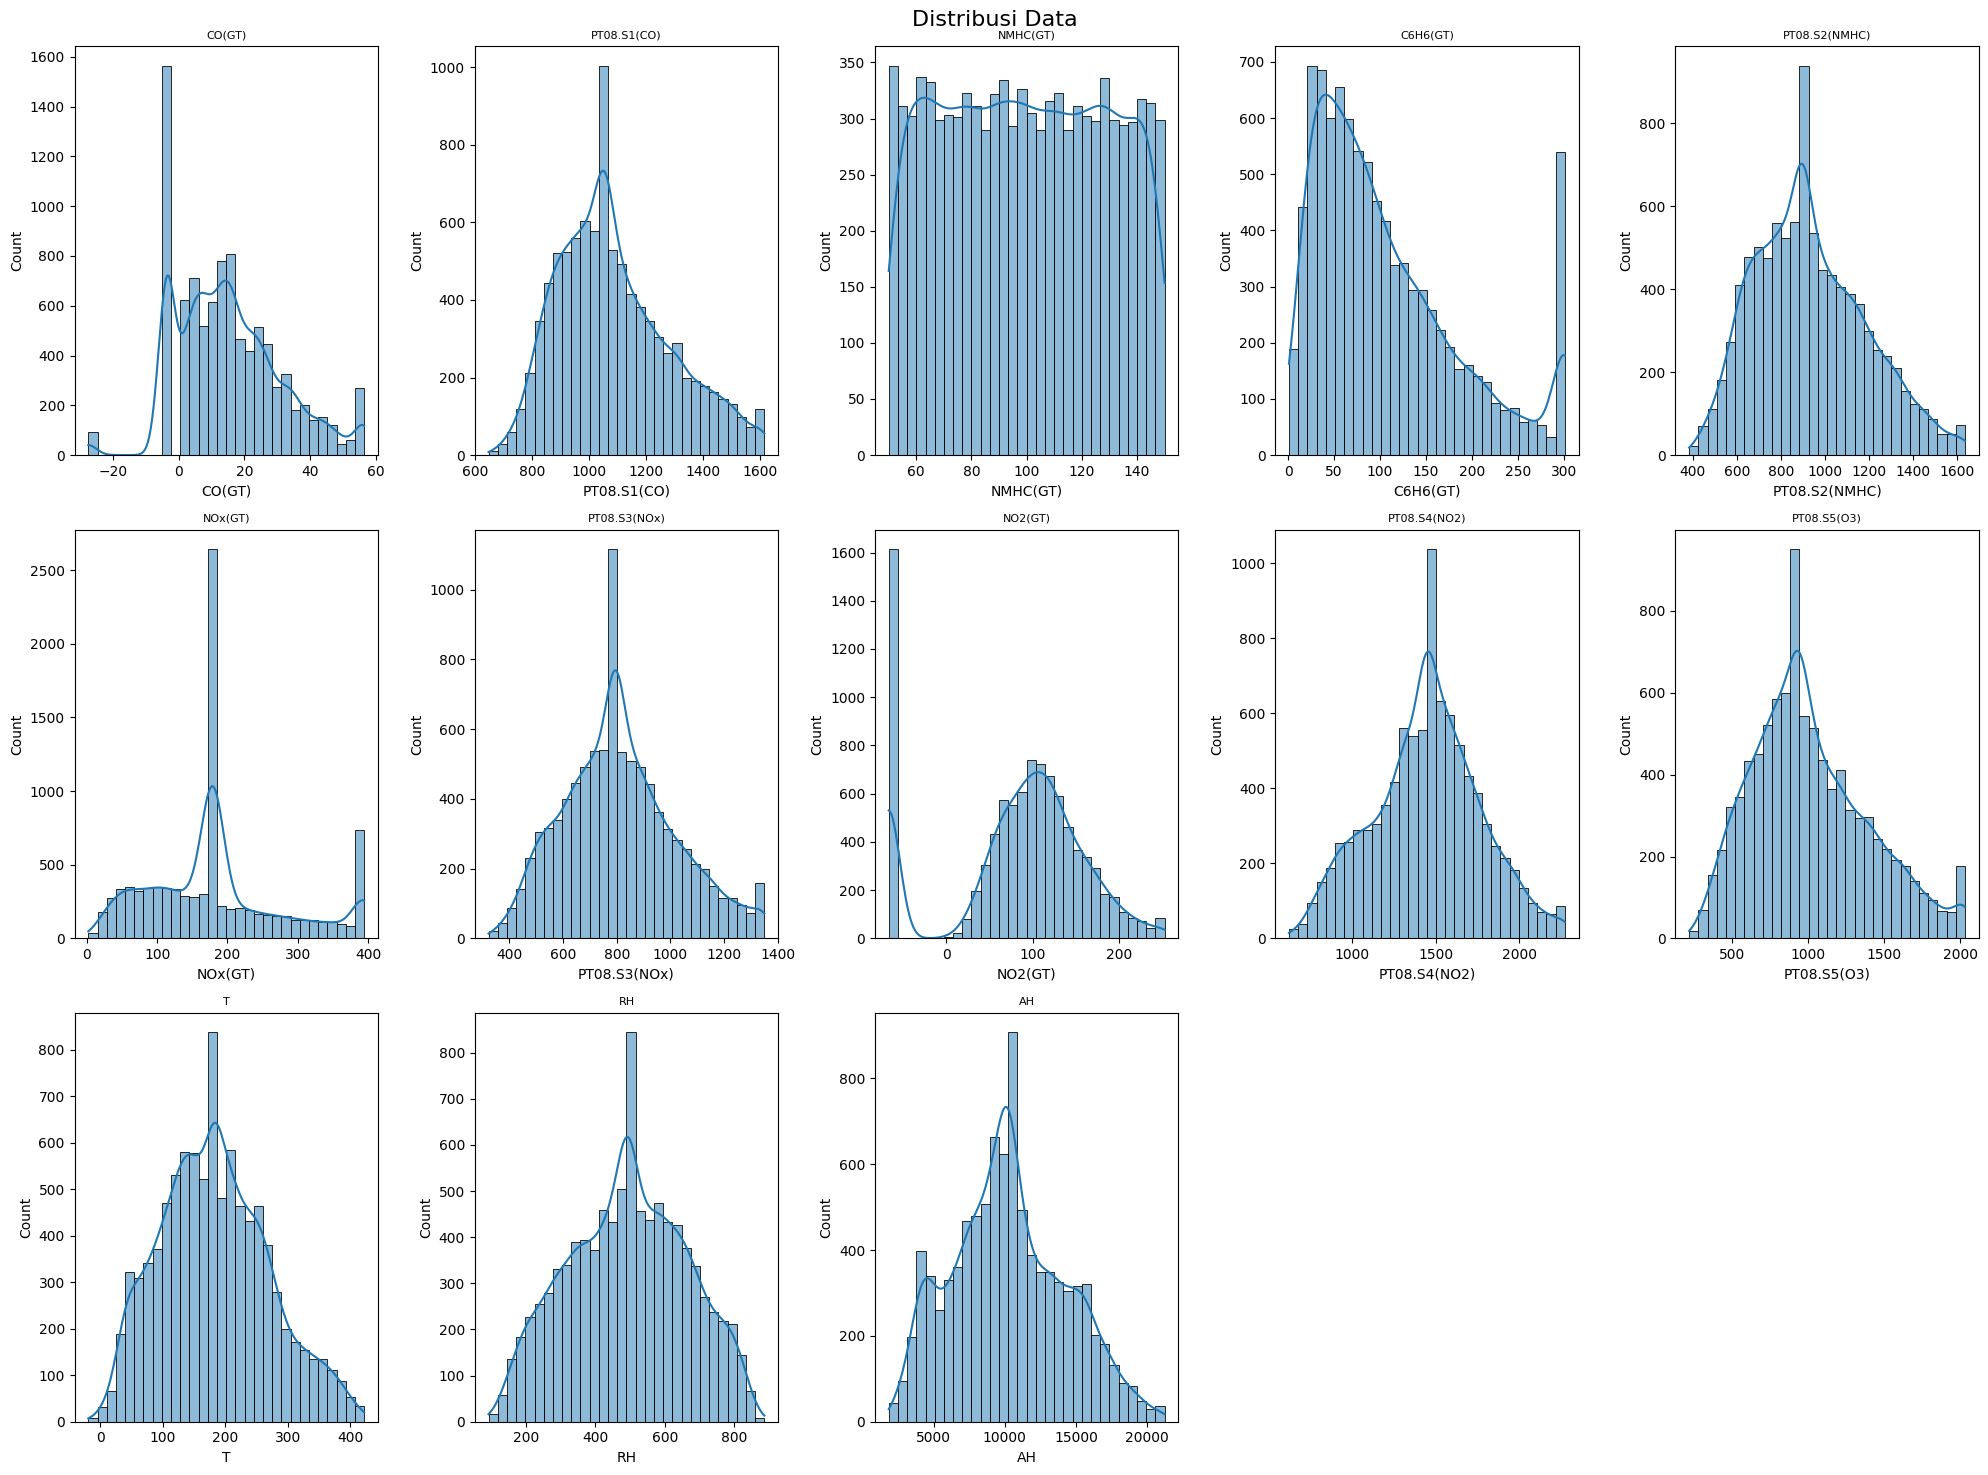

Data setelah normalisasi/standarisasi:
          Date Time    CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
0  2004-10-03  NaT  0.636905     0.735810  0.548793  0.393333       0.529764   
1  2004-10-03  NaT  0.351190     0.665635  0.715185  0.310000       0.457052   
2  2004-10-03  NaT  0.589286     0.779154  0.602748  0.296667       0.444267   
3  2004-10-03  NaT  0.589286     0.752322  0.544862  0.303333       0.451458   
4  2004-10-03  NaT  0.517857     0.644995  0.423622  0.213333       0.361966   

    NOx(GT)  PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T  \
0  0.417834      0.714008  0.562500      0.648636     0.578453  0.351076   
1  0.257325      0.828794  0.496875      0.568030     0.414917  0.344281   
2  0.328662      0.795720  0.565625      0.565606     0.471271  0.312571   
3  0.433121      0.749027  0.590625      0.583182     0.542541  0.292186   
4  0.328662      0.858949  0.571875      0.526212     0.491160  0.296716   

         RH        AH 

In [77]:
# 1. Cek Null/Nan
null_counts = dt_clean_final.isnull().sum()
missing_percentage = (null_counts / len(dt_clean_final)) * 100
print(f"Jumlah nilai null/Nan Setelah Cleansing:\n{null_counts}")
print(f"\nPersentase missing values per kolom:\n{missing_percentage}")

# 2. Cek Duplicate
duplicate_counts = dt_clean_final.duplicated().sum()
print(f"Jumlah duplikat: {duplicate_counts}")
dt_clean_clipped = dt_clean_final.drop_duplicates()
print(f"Jumlah data setelah menghapus duplikat: {len(dt_clean_clipped)}")

# 3. Cek Distribusi Data (Normalitas)
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols):
    plt.subplot(int(np.ceil(len(numeric_cols) / 5)), 5, i + 1)
    sns.histplot(dt_clean_final[col], kde=True, bins=30)
    plt.title(col, fontsize=8)

plt.suptitle("Distribusi Data", fontsize=16)
plt.tight_layout()
plt.show()

# 4. Normalisasi
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dt_clean_final[numeric_cols])
dt_clean_final[numeric_cols] = scaled_data

print("Data setelah normalisasi/standarisasi:\n", dt_clean_final.head())

In [78]:
print(dt_clean_final.dtypes)

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object


In [79]:
dt_clean_final.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [80]:
print(dt_clean_final.isna().sum())

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


# **MODELING**

In [81]:
#SPLIT DATA

# Memisahkan target (X) dan fitur (y)
x = dt_clean_final.drop(['CO(GT)', 'Date', 'Time'], axis=1) #fitur-fitur inputan, mengecualikan date dan time
y = dt_clean_final['CO(GT)'] #target yang ingin diprediksi

# Membagi data menjadi data pelatihan dan pengujian
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [82]:
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (7458, 12)
y_train shape: (7458,)


In [83]:
#Melatih Model
model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
model.fit(x_train, y_train)

LinearRegression()

In [84]:
# Analisis Regresi Linier
x_train_const = sm.add_constant(x_train)
ols_model = sm.OLS(y_train, x_train_const)
result = ols_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 CO(GT)   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     1020.
Date:                Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                        10:59:49   Log-Likelihood:                 5487.4
No. Observations:                7458   AIC:                        -1.095e+04
Df Residuals:                    7445   BIC:                        -1.086e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1068      0.018      6.100

In [85]:
# Prediksi Model
y_pred = model.predict(x_test)

In [86]:
intercept = model.intercept_ # Mendapatkan nilai intercept dari model
coefficients = model.coef_ # Mendapatkan koefisien untuk setiap fitur

print("Intercept:", intercept)
print("Koefisien:", coefficients)

Intercept: 0.10679608189156908
Koefisien: [ 0.00556283  0.00444066  0.13264286  0.14850829  0.05938123  0.05336256
  0.3661408   0.10665744  0.05873583 -0.06716325  0.03298271 -0.00268337]


In [87]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd

# Feature selection pada data latih
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(x_train, y_train)

# Melihat skor tiap fitur
feature_scores = pd.DataFrame({
    'Feature': x_train.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print("Skor fitur berdasarkan SelectKBest:")
print(feature_scores)

Skor fitur berdasarkan SelectKBest:
          Feature        Score
6         NO2(GT)  5966.712122
8     PT08.S5(O3)  4701.544711
3   PT08.S2(NMHC)  4357.421766
2        C6H6(GT)  4053.905265
0     PT08.S1(CO)  3750.067293
5    PT08.S3(NOx)  2940.458768
4         NOx(GT)  1659.193696
7    PT08.S4(NO2)   946.019974
11             AH    47.439037
9               T    23.290318
1        NMHC(GT)     2.498081
10             RH     0.909736


In [88]:
selected_features = ['NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'RH', 'T', 'AH']
X_custom = dt_clean_final[selected_features]
y_custom = dt_clean_final['CO(GT)']

# Split
x_train_custom, x_test_custom, y_train_custom, y_test_custom = train_test_split(X_custom, y_custom, test_size=0.2, random_state=42)

# Scaling (opsional tergantung model)
scaler = StandardScaler()
x_train_custom_scaled = scaler.fit_transform(x_train_custom)
x_test_custom_scaled = scaler.transform(x_test_custom)
print("X_train shape:", x_train_custom_scaled.shape)
print("y_train shape:", y_train_custom.shape)

X_train shape: (7458, 7)
y_train shape: (7458,)


In [89]:
#selected_features = ['NMHC(GT)', 'C6H6(GT)', 'NOx(GT)']

# Gunakan hanya fitur terpilih
x_train_selected = x_train[selected_features]
x_test_selected = x_test[selected_features]

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Inisialisasi dan pelatihan model
model = LinearRegression()
model.fit(x_train_selected, y_train)

# Prediksi
y_pred = model.predict(x_test_selected)

# **EVALUATION**

In [91]:
# Evaluasi
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE) Model LR: {mse:.2f}')
print(f'R-Squared (R²) Model LR: {r2:.2f}')

Mean Squared Error (MSE) Model LR: 0.01
R-Squared (R²) Model LR: 0.59


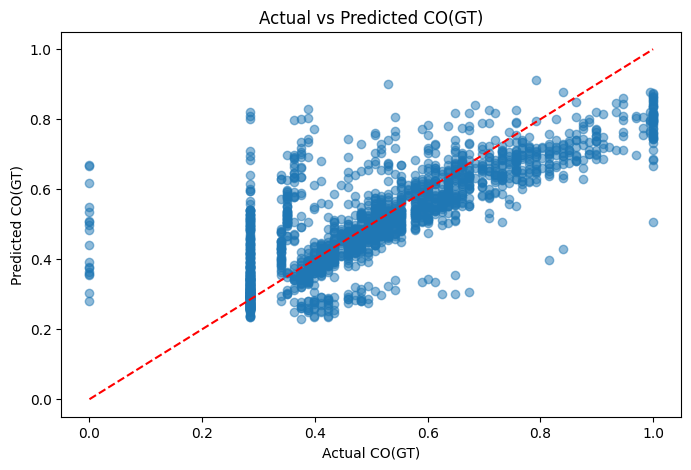

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual CO(GT)")
plt.ylabel("Predicted CO(GT)")
plt.title("Actual vs Predicted CO(GT)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # garis ideal
plt.show()

In [93]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly_train = poly.fit_transform(x_train_selected)
x_poly_test = poly.transform(x_test_selected)

model_poly = LinearRegression()
model_poly.fit(x_poly_train, y_train)
y_pred_poly = model_poly.predict(x_poly_test)

print("R2 poly:", r2_score(y_test, y_pred_poly))

R2 poly: 0.6536040809476389


In [94]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(x_train_selected, y_train)
y_pred_rf = rf.predict(x_test_selected)

print("MSE RF:", mean_squared_error(y_test, y_pred_rf))
print("R2 RF:", r2_score(y_test, y_pred_rf))

MSE RF: 0.011270723648452743
R2 RF: 0.6883955879018964


In [95]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid.fit(x_train_selected, y_train)

print("Best Params:", grid.best_params_)
print("Best R2:", grid.best_score_)

Best Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best R2: 0.691641561554075


# **OPTIMASI MODEL (CLEANING ULANG)**

In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
dt = pd.read_csv('https://raw.githubusercontent.com/rosease/TP1_DataMining/refs/heads/main/AirQualityUCI.csv', sep=';', decimal=',')

# Drop kolom tidak penting
dt.drop(columns=['Unnamed: 15', 'Unnamed: 16'], inplace=True, errors='ignore')
dt.dropna(how='all', inplace=True)

# Ganti -200 jadi NaN
dt.replace(-200, np.nan, inplace=True)

# Gabungkan dan konversi Date + Time
dt['DateTime'] = pd.to_datetime(dt['Date'] + ' ' + dt['Time'], format='%d/%m/%Y %H.%M.%S', errors='coerce')
dt.drop(columns=['Date', 'Time'], inplace=True)

# Hapus baris yang mengandung NaN
dt_clean = dt.dropna()

In [97]:
# Pisahkan fitur dan target
X = dt_clean.drop(columns=['CO(GT)', 'DateTime'])
y = dt_clean['CO(GT)']

In [98]:
# Feature selection
selector = SelectKBest(score_func=f_regression, k=7)
X = X.loc[:, selector.fit(X, y).get_support()]

In [99]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
# Standardisasi
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# **MEMBANDINGKAN DENGAN MODEL LAIN (FINAL EVALUATION)**

In [101]:
# Model
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regression": SVR()
}

In [102]:
# Evaluasi
results = {}
for name, model in models.items():
    if name == "Support Vector Regression":
        model.fit(x_train_scaled, y_train)
        y_pred = model.predict(x_test_scaled)
    else:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}

# Output
results_dt = pd.DataFrame(results).T.sort_values(by="R2", ascending=False)
print(results_dt)

                                MSE        R2
Linear Regression          0.064175  0.969171
Support Vector Regression  0.069579  0.966575
Random Forest              0.070954  0.965914
Gradient Boosting          0.082145  0.960539


In [103]:
# Inisialisasi model
lr = LinearRegression()

# Fit model ke data pelatihan
lr.fit(x_train, y_train)

# Prediksi pada data uji
y_pred = lr.predict(x_test)

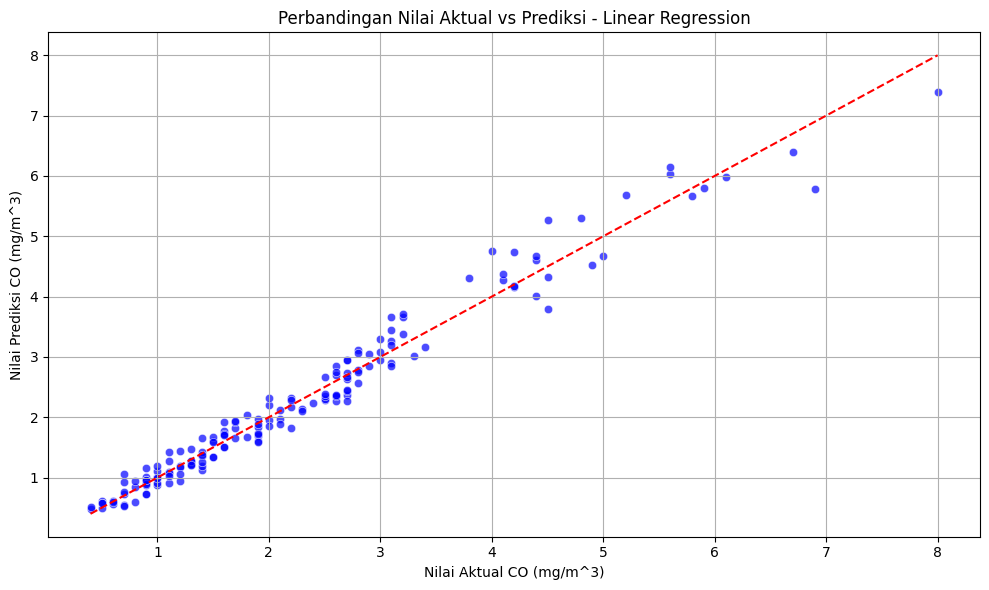

In [104]:
# Prediksi pada data uji
y_pred = lr.predict(x_test)  # menggunakan model Linear Regression (lr)

# Visualisasi aktual vs prediksi
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis ideal
plt.xlabel("Nilai Aktual CO (mg/m^3)")
plt.ylabel("Nilai Prediksi CO (mg/m^3)")
plt.title("Perbandingan Nilai Aktual vs Prediksi - Linear Regression")
plt.grid(True)
plt.tight_layout()
plt.show()

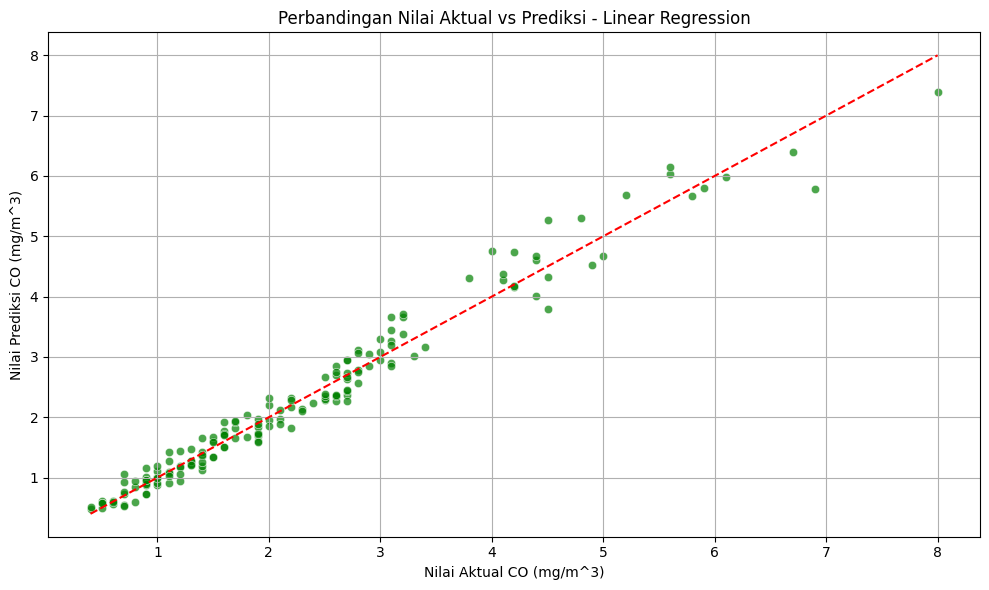

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Nilai Aktual CO (mg/m^3)")
plt.ylabel("Nilai Prediksi CO (mg/m^3)")
plt.title("Perbandingan Nilai Aktual vs Prediksi - Linear Regression")
plt.grid(True)
plt.tight_layout()
plt.show()

Dari test ini model terbaik yang diperoleh adalah melalui optimasi model menggunakan Polynomial dengan MSE : 0.064175 dan R2: 0.969171 pada model Regresi Linier


In [106]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=7)
X_new = selector.fit_transform(X, y)

selected_features = selector.get_support()
selected_feature_names = X.columns[selected_features]
print(selected_feature_names)

Index(['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S4(NO2)', 'PT08.S5(O3)'],
      dtype='object')


# **MENYIMPAN MODEL**

In [102]:
import joblib
joblib.dump(model, 'best_linear_regression_model.pkl')

['best_linear_regression_model.pkl']

# **DASHBOARD**

In [111]:
!pip install pyngrok

In [112]:
!ngrok authtoken add-authtoken USE YOUR OWN AUTHTOKEN

ERROR:  accepts 1 arg(s), received 5


In [113]:
!pip install streamlit

In [114]:
import streamlit as st

In [115]:
from pyngrok import ngrok
ngrok.kill()  # Matikan semua tunnel dan sesi ngrok aktif

In [116]:
from pyngrok import ngrok
import threading
import os

# Install ngrok jika belum terpasang
!pip install pyngrok

# Pasang authtoken ngrok (ganti dengan token milikmu)
!ngrok authtoken 2xLM3MjHsTByyLzPWWMNd7BjwrN_CHxtuR1F1Dn1wfKoch8r

from pyngrok import ngrok

# Membuat tunnel ke port 8501 (misalnya untuk streamlit)
public_url = ngrok.connect(8501)
print("Tunnel URL:", public_url)

def run_streamlit():
  os.system("streamlit run app.py --server.port 8501")
thread = threading.Thread(target=run_streamlit)
thread.start()

public_url = ngrok.connect(addr='8501')
print(public_url)

Authtoken saved to configuration file: C:\Users\LENOVO\AppData\Local/ngrok/ngrok.yml


t=2025-06-01T16:03:07+0700 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration file: https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/agents\r\n\r\nERR_NGROK_108\r\n"
t=2025-06-01T16:03:07+0700 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration fil

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration file: https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/agents\r\n\r\nERR_NGROK_108\r\n.

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import plotly.express as px
import plotly.graph_objects as go



st.set_page_config(
    page_title="Dashboard Prediksi CO(GT) Berdasarkan Data Pendukung",
    page_icon="🌫️",
    layout="wide"
)

# Fungsi untuk memuat model
@st.cache_resource
def load_model():
    return joblib.load('best_linear_regression_model.pkl')

# Load model
model = load_model()

# Judul Dashboard
st.title("Dashboard Prediksi Konsentrasi CO (GT)")

st.markdown("""
### Prediksi Konsentrasi Karbon Monoksida (CO - GT)
Model Linear Regression ini memprediksi nilai CO (GT) berdasarkan 7 fitur:
- NMHC(GT)
- C6H6(GT)
- NOx(GT)
- NO2(GT)
- RH (Kelembaban)
- T (Temperatur)
- AH (Absolute Humidity)
""")

st.markdown("---")

# Input data pengguna
st.subheader("Input Fitur untuk Prediksi")

col1, col2, col3 = st.columns(3)
with col1:
    nmhc = st.number_input("NMHC(GT)", value=100.0)
    nox = st.number_input("NOx(GT)", value=50.0)
    ah = st.number_input("AH", value=0.9)
with col2:
    c6h6 = st.number_input("C6H6(GT)", value=5.0)
    no2 = st.number_input("NO2(GT)", value=30.0)
with col3:
    rh = st.number_input("RH", value=45.0)
    t = st.number_input("T", value=20.0)

# Membuat DataFrame dari input
input_df = pd.DataFrame([[nmhc, c6h6, nox, no2, rh, t, ah]],
                        columns=['NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'RH', 'T', 'AH'])

# Prediksi CO(GT)
if st.button("Prediksi CO (GT)", type="primary"):
    prediction = model.predict(input_df)[0]

    st.success(f"Prediksi Konsentrasi CO (GT): {prediction:.2f}")

    # Visualisasi
    fig = go.Figure(data=[
        go.Indicator(
            mode="gauge+number",
            value=prediction,
            title={"text": "CO (GT)"},
            gauge={
                "axis": {"range": [None, max(10, prediction + 1)]},
                "bar": {"color": "darkblue"},
                "steps": [
                    {"range": [0, 2], "color": "lightgreen"},
                    {"range": [2, 6], "color": "yellow"},
                    {"range": [6, 10], "color": "orange"},
                ]
            }
        )
    ])
    fig.update_layout(height=400)
    st.plotly_chart(fig)

st.markdown("---")
st.caption("Dibuat untuk prediksi CO berbasis regresi linear.")
